In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas

data = pd.read_csv("/Users/imec.eu.com/Downloads/Vin_Selecting_features_based_on_correlation.csv")
data

,classe,mean,entropyRatio,fftPhaseEntropy,fftPowerEntropy,fftPowerEntropylog,fftPhaseEntropyRatio,h1,premiereDemiVie,deuxiemeDemiVie,...,correlationMean,correlationStd,meanHSCSdist,stdHSCSdist,meanCSHSdist,stdCSHSdist,meanRatiosZones45,sumEntropyCircle,ratioSumEntropyCircle,ratioSumEntropyLine
0,0,322.118530,1.406498,12.374762,10.315221,15.467597,1.333558,199111.930742,6,15,...,0.896127,0.075448,5.05,1.490805,4.55,1.312440,1.003788,7.195117,1.429413,1.373172
1,0,335.817444,1.391341,12.373175,10.315221,15.468475,1.333664,254383.712207,9,15,...,0.864901,0.093153,6.35,0.743303,5.90,1.841195,1.001512,7.157702,1.423854,1.373978
2,0,362.328339,1.406071,12.374395,10.315221,15.468597,1.333582,233492.454765,7,14,...,0.877207,0.080311,6.05,0.878920,4.75,0.750000,1.001805,7.185321,1.425943,1.369855
3,0,367.816925,1.413531,12.375006,10.315221,15.466827,1.333541,256522.356858,9,15,...,0.808676,0.145763,9.00,2.711088,8.45,2.936409,1.006358,7.324514,1.429402,1.369025
4,0,349.348022,1.393388,12.373663,10.315221,15.467315,1.333632,218791.612252,10,14,...,0.870319,0.082421,5.30,0.640312,4.85,0.975961,1.002116,7.213184,1.423335,1.373444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1,341.097046,1.394558,12.374487,10.315221,15.468414,1.333574,219660.875906,7,15,...,0.851055,0.121132,5.75,2.441823,4.40,1.593738,1.006389,7.243366,1.425336,1.371072
137,1,321.331116,1.386698,12.375250,10.315221,15.467193,1.333525,199670.200591,4,16,...,0.878484,0.095311,5.45,2.350000,4.20,1.400000,1.002586,7.119524,1.423750,1.372513
138,1,390.078461,1.378518,12.374273,10.315221,15.467193,1.333590,219870.580397,4,14,...,0.934578,0.056515,6.50,1.204159,4.85,1.533786,1.001577,7.168048,1.431351,1.370493
139,1,340.411987,1.382251,12.373785,10.315221,15.467682,1.333623,214357.125583,5,15,...,0.853659,0.114117,5.20,1.288410,3.70,0.842615,1.002232,7.192248,1.433308,1.372554


In [3]:
df = data.copy()

# Exploration des données

In [4]:
pd.set_option('display.max_row', 103)


In [5]:
df.dtypes.value_counts()

float64    38
int64      14
dtype: int64

<AxesSubplot:ylabel='None'>

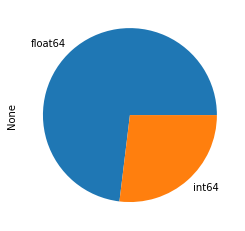

In [6]:
df.dtypes.value_counts().plot.pie()

In [8]:
df['classe'].value_counts()

0    72
1    69
Name: classe, dtype: int64

In [9]:
df['classe'].value_counts(normalize=True)

0    0.510638
1    0.489362
Name: classe, dtype: float64

In [10]:
df['classe'].unique()

array([0, 1])

# Création de sous ensembles Bordeaux, Cahors et Rosé

In [11]:
marague_df = df[df['classe'] == 0]
sarabelle_df = df[df['classe'] == 1]
#rose_df = df[df['classe'] == 3]

# Création des ensembles formes, intensité, entropy et corrélation 

In [12]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [14]:
dtf = df.rename(columns={"classe":"Y"})
dtf

,Y,mean,entropyRatio,fftPhaseEntropy,fftPowerEntropy,fftPowerEntropylog,fftPhaseEntropyRatio,h1,premiereDemiVie,deuxiemeDemiVie,...,correlationMean,correlationStd,meanHSCSdist,stdHSCSdist,meanCSHSdist,stdCSHSdist,meanRatiosZones45,sumEntropyCircle,ratioSumEntropyCircle,ratioSumEntropyLine
0,0,322.118530,1.406498,12.374762,10.315221,15.467597,1.333558,199111.930742,6,15,...,0.896127,0.075448,5.05,1.490805,4.55,1.312440,1.003788,7.195117,1.429413,1.373172
1,0,335.817444,1.391341,12.373175,10.315221,15.468475,1.333664,254383.712207,9,15,...,0.864901,0.093153,6.35,0.743303,5.90,1.841195,1.001512,7.157702,1.423854,1.373978
2,0,362.328339,1.406071,12.374395,10.315221,15.468597,1.333582,233492.454765,7,14,...,0.877207,0.080311,6.05,0.878920,4.75,0.750000,1.001805,7.185321,1.425943,1.369855
3,0,367.816925,1.413531,12.375006,10.315221,15.466827,1.333541,256522.356858,9,15,...,0.808676,0.145763,9.00,2.711088,8.45,2.936409,1.006358,7.324514,1.429402,1.369025
4,0,349.348022,1.393388,12.373663,10.315221,15.467315,1.333632,218791.612252,10,14,...,0.870319,0.082421,5.30,0.640312,4.85,0.975961,1.002116,7.213184,1.423335,1.373444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1,341.097046,1.394558,12.374487,10.315221,15.468414,1.333574,219660.875906,7,15,...,0.851055,0.121132,5.75,2.441823,4.40,1.593738,1.006389,7.243366,1.425336,1.371072
137,1,321.331116,1.386698,12.375250,10.315221,15.467193,1.333525,199670.200591,4,16,...,0.878484,0.095311,5.45,2.350000,4.20,1.400000,1.002586,7.119524,1.423750,1.372513
138,1,390.078461,1.378518,12.374273,10.315221,15.467193,1.333590,219870.580397,4,14,...,0.934578,0.056515,6.50,1.204159,4.85,1.533786,1.001577,7.168048,1.431351,1.370493
139,1,340.411987,1.382251,12.373785,10.315221,15.467682,1.333623,214357.125583,5,15,...,0.853659,0.114117,5.20,1.288410,3.70,0.842615,1.002232,7.192248,1.433308,1.372554


In [15]:
def fct_cramer_correlation(dataset, x, y="classe", printt=True):
    cont_table = pd.crosstab(index=dataset[x], columns=dataset[y])
    chi2_test = scipy.stats.chi2_contingency(cont_table)
    chi2, p = chi2_test[0], chi2_test[1]
    n = cont_table.sum().sum()
    phi2 = chi2/n
    r,k = cont_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
    coeff, p = round(coeff, 3), round(p, 3)
    conclusion = "Significant" if p < 0.05 else "Non-Significant"
    if printt==True:
        print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")
    return [x, coeff, conclusion, p]

In [16]:
fct_cramer_correlation(dtf, x="nbStreamer", y="Y", printt=True)

Cramer Correlation: 0.0 Non-Significant (p-value:0.761)


['nbStreamer', 0.0, 'Non-Significant', 0.761]

In [17]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.2)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train shape: (112, 51) | X_test shape: (29, 51)
y_train mean: 0.49 | y_test mean: 0.48
52 features: ['mean', 'entropyRatio', 'fftPhaseEntropy', 'fftPowerEntropy', 'fftPowerEntropylog', 'fftPhaseEntropyRatio', 'h1', 'premiereDemiVie', 'deuxiemeDemiVie', 'nbDeperd95', 'nbStreamer', 'frequAngStream', 'distance1stDecay', 'firstDecay', 'nbPicsSignif', 'ampl1Pic', 'long1Pic', 'ampl2Pic', 'long2Pic', 'diff1ersPics', 'coronaLength', 'hs_ValMean', 'hs_DistMean', 'halfHighratioMean', 'halfHighICratioMean', 'meanRatioSlopeMean', 'stdRatioSlopeMean', 'medianRatioSlopeMean', 'stdLineHS', 'hs_DistHS', 'halfHightDistHS', 'halfHighratioHS', 'halfHighICratioHS', 'meanRatioSlopeHS', 'stdRatioSlopeHS', 'medianRatioSlopeHS', 'halfHightDistHigh10', 'halfHighratioHigh10', 'halfHighICratioHigh10', 'meanRatioSlopeHigh10', 'medianRatioSlopeHigh10', 'correlationMean', 'correlationStd', 'meanHSCSdist', 'stdHSCSdist', 'meanCSHSdist', 'stdCSHSdist', 'meanRatiosZones45', 'sumEntropyCircle', 'ratioSumEntropyCircle

In [18]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(dtf_train.drop("Y", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", axis=1).columns, index=dtf_train.index)
dtf_scaled["Y"] = dtf_train["Y"]
dtf_scaled.head()

,mean,entropyRatio,fftPhaseEntropy,fftPowerEntropy,fftPowerEntropylog,fftPhaseEntropyRatio,h1,premiereDemiVie,deuxiemeDemiVie,nbDeperd95,...,correlationStd,meanHSCSdist,stdHSCSdist,meanCSHSdist,stdCSHSdist,meanRatiosZones45,sumEntropyCircle,ratioSumEntropyCircle,ratioSumEntropyLine,Y
139,0.240279,0.311582,0.400000,1.0,0.519231,0.599929,0.359582,0.153846,0.727273,0.7500,...,0.378647,0.205357,0.188586,0.000000,0.044256,0.056677,0.346251,0.929253,0.535639,1
50,0.156018,0.224190,0.666667,1.0,0.750000,0.333268,0.367051,0.307692,0.818182,0.1250,...,0.305207,0.580357,0.199221,0.540984,0.104507,0.010701,0.154491,0.589226,0.592687,0
1,0.228225,0.404054,0.233333,1.0,0.769231,0.766614,0.548111,0.461538,0.727273,0.6250,...,0.290699,0.410714,0.036983,0.360656,0.262705,0.035974,0.273261,0.433019,0.646297,0
26,0.627421,0.606119,0.650000,1.0,0.769231,0.349933,0.435661,0.384615,0.636364,0.7500,...,0.059375,0.526786,0.198171,0.327869,0.110308,0.038343,0.538397,0.465107,0.161119,0
99,0.263320,0.270063,0.683333,1.0,0.519231,0.316603,0.498433,0.230769,0.727273,0.6875,...,0.608133,0.285714,0.455401,0.344262,0.074266,0.133737,0.485396,0.526319,0.467047,1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<AxesSubplot:xlabel='selection', ylabel='features'>

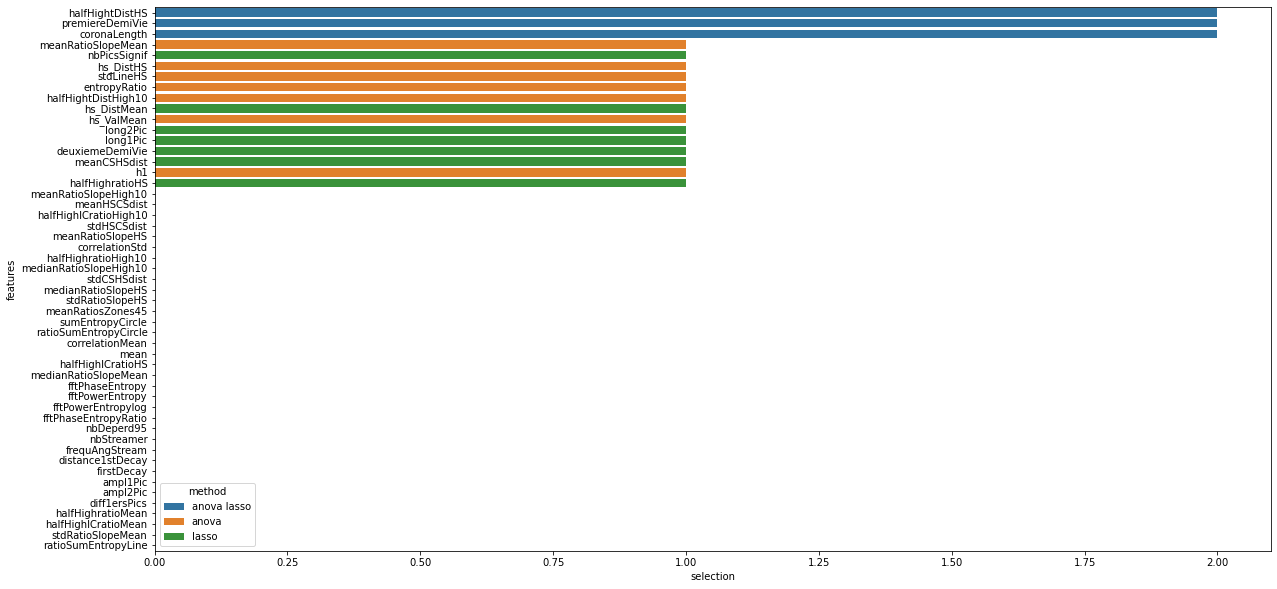

In [19]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
plt.figure(figsize=(20,10))
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

In [20]:
anova_result = [item for item in anova_selected_features]
anova_result

['entropyRatio',
 'h1',
 'premiereDemiVie',
 'coronaLength',
 'hs_ValMean',
 'meanRatioSlopeMean',
 'stdLineHS',
 'hs_DistHS',
 'halfHightDistHS',
 'halfHightDistHigh10']

In [21]:
lasso_result =  [item for item in lasso_selected_features]
lasso_result

['premiereDemiVie',
 'deuxiemeDemiVie',
 'nbPicsSignif',
 'long1Pic',
 'long2Pic',
 'coronaLength',
 'hs_DistMean',
 'halfHightDistHS',
 'halfHighratioHS',
 'meanCSHSdist']

In [22]:
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list
  
# Driver Code
lst1 = anova_result
lst2 = lasso_result
print(Union(lst1, lst2))

['entropyRatio', 'halfHightDistHigh10', 'meanCSHSdist', 'hs_DistMean', 'meanRatioSlopeMean', 'nbPicsSignif', 'halfHighratioHS', 'hs_ValMean', 'coronaLength', 'h1', 'halfHightDistHS', 'hs_DistHS', 'long1Pic', 'long2Pic', 'premiereDemiVie', 'deuxiemeDemiVie', 'stdLineHS']


In [23]:
k = Union(lst1, lst2)

In [73]:
print(dtf_features["selection"]) 

0     1
1     1
2     0
3     1
4     2
5     0
6     0
7     2
8     0
9     0
10    0
11    0
12    0
13    0
14    2
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    2
26    0
27    1
28    0
29    0
30    0
31    0
32    0
33    1
34    1
35    0
36    0
37    0
38    0
39    0
40    0
41    1
42    1
43    2
44    0
45    0
46    1
47    0
48    0
49    0
50    0
Name: selection, dtype: int64


In [25]:
pd.DataFrame(model.feature_importances_, index=dtf_train.drop("Y", axis=1).columns)

,0
mean,0.013237
entropyRatio,0.034141
fftPhaseEntropy,0.016400
fftPowerEntropy,0.000311
fftPowerEntropylog,0.015110
fftPhaseEntropyRatio,0.022839
h1,0.043402
premiereDemiVie,0.018213
deuxiemeDemiVie,0.003514
nbDeperd95,0.015590


<AxesSubplot:>

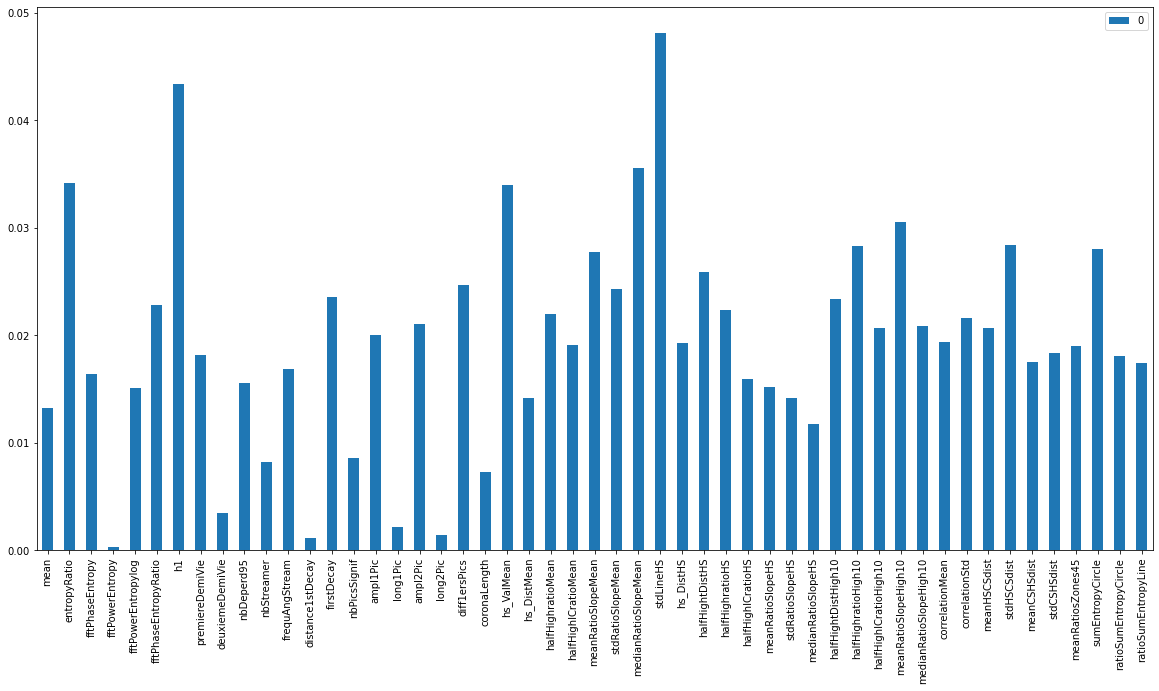

In [24]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
pd.DataFrame(model.feature_importances_, index=dtf_train.drop("Y", axis=1).columns).plot.bar(figsize=(20,10))



In [26]:
X_names = k
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [27]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(dtf_train.drop("Y", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", axis=1).columns, index=dtf_train.index)
dtf_scaled["Y"] = dtf_train["Y"]
dtf_scaled.head()

,mean,entropyRatio,fftPhaseEntropy,fftPowerEntropy,fftPowerEntropylog,fftPhaseEntropyRatio,h1,premiereDemiVie,deuxiemeDemiVie,nbDeperd95,...,correlationStd,meanHSCSdist,stdHSCSdist,meanCSHSdist,stdCSHSdist,meanRatiosZones45,sumEntropyCircle,ratioSumEntropyCircle,ratioSumEntropyLine,Y
139,0.240279,0.311582,0.400000,1.0,0.519231,0.599929,0.359582,0.153846,0.727273,0.7500,...,0.378647,0.205357,0.188586,0.000000,0.044256,0.056677,0.346251,0.929253,0.535639,1
50,0.156018,0.224190,0.666667,1.0,0.750000,0.333268,0.367051,0.307692,0.818182,0.1250,...,0.305207,0.580357,0.199221,0.540984,0.104507,0.010701,0.154491,0.589226,0.592687,0
1,0.228225,0.404054,0.233333,1.0,0.769231,0.766614,0.548111,0.461538,0.727273,0.6250,...,0.290699,0.410714,0.036983,0.360656,0.262705,0.035974,0.273261,0.433019,0.646297,0
26,0.627421,0.606119,0.650000,1.0,0.769231,0.349933,0.435661,0.384615,0.636364,0.7500,...,0.059375,0.526786,0.198171,0.327869,0.110308,0.038343,0.538397,0.465107,0.161119,0
99,0.263320,0.270063,0.683333,1.0,0.519231,0.316603,0.498433,0.230769,0.727273,0.6875,...,0.608133,0.285714,0.455401,0.344262,0.074266,0.133737,0.485396,0.526319,0.467047,1


In [28]:
## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=112, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model2 = random_search.best_estimator_

Best Model parameters: {'subsample': 0.9, 'n_estimators': 750, 'min_samples_split': 40, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 2, 'learning_rate': 0.005}
Best Model mean accuracy: 0.6533596837944665


/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_3567/381651244.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(scipy.interp(mean_fpr, fpr, tpr))
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_3567/381651244.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(scipy.interp(mean_fpr, fpr, tpr))
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_3567/381651244.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(scipy.interp(mean_fpr, fpr, tpr))
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_3567/381651244.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(scipy.interp(mean_fpr, fpr, tpr))
/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipy

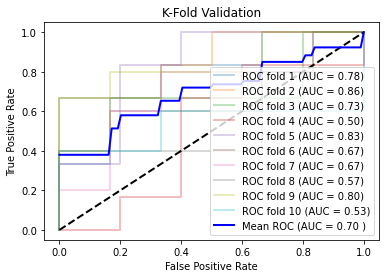

In [29]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
   prediction = model.fit(X_train[train],
                y_train[train]).predict_proba(X_train[test])
   fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1],pos_label=1)
   tprs.append(scipy.interp(mean_fpr, fpr, tpr))
   roc_auc = metrics.auc(fpr, tpr)
   aucs.append(roc_auc)
   plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
   i = i+1
   
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()

In [30]:
## train
model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [31]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted, pos_label=1)
precision = metrics.precision_score(y_test, predicted, pos_label=1)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,1))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.62
Auc: 0.64
Recall (all 1s predicted right): 0.5
Precision (confidence when predicting a 1): 0.6
Detail:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.64      0.50      0.56        14

    accuracy                           0.62        29
   macro avg       0.62      0.62      0.61        29
weighted avg       0.62      0.62      0.62        29



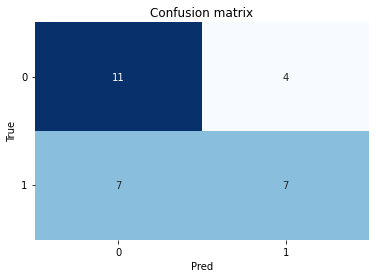

In [32]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

In [79]:
print("True:", y_test[4], "--> Pred:", predicted[4], "| Prob:", np.max(predicted_prob[4]))

True: 0 --> Pred: 0 | Prob: 0.010013525256206744


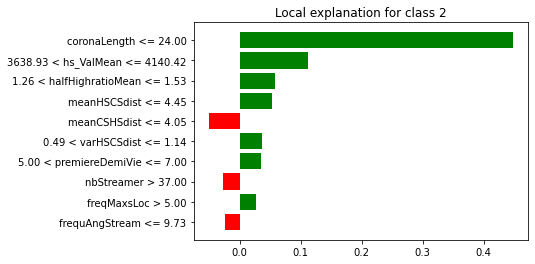

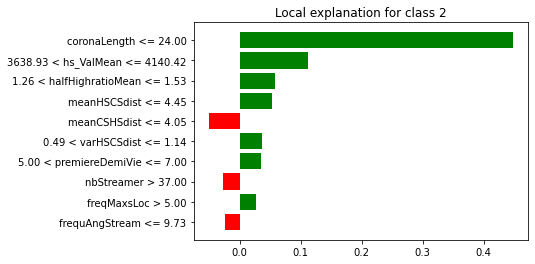

In [95]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names=np.unique(y_train), mode="classification")
explained = explainer.explain_instance(X_test[4], model.predict_proba, num_features=10)
explained.as_pyplot_figure()

True: 2 --> Pred: 2 | Prob: 0.9958159446599292
True: 1 --> Pred: 1 | Prob: 0.005884229113528838
True: 2 --> Pred: 2 | Prob: 0.990814280364594
True: 1 --> Pred: 1 | Prob: 0.01203428506001192
True: 2 --> Pred: 2 | Prob: 0.9605235760187901
True: 2 --> Pred: 1 | Prob: 0.2493041484880223
True: 2 --> Pred: 2 | Prob: 0.9187650560165466
True: 1 --> Pred: 1 | Prob: 0.0035068056231691504
True: 1 --> Pred: 1 | Prob: 0.05455262909919903
True: 1 --> Pred: 1 | Prob: 0.03442483971731039
True: 2 --> Pred: 2 | Prob: 0.9893794470453616
True: 1 --> Pred: 1 | Prob: 0.1137460885641239
True: 2 --> Pred: 2 | Prob: 0.6739584710487859
True: 2 --> Pred: 1 | Prob: 0.22897581855790808
True: 2 --> Pred: 2 | Prob: 0.9177557789936276
True: 2 --> Pred: 1 | Prob: 0.012440406161956805
True: 1 --> Pred: 1 | Prob: 0.10686659310505041
True: 2 --> Pred: 2 | Prob: 0.5474300035809456
True: 2 --> Pred: 2 | Prob: 0.6001633318427477
True: 2 --> Pred: 1 | Prob: 0.17572099266015032
True: 2 --> Pred: 2 | Prob: 0.8646295910077793


/opt/anaconda3/lib/python3.9/site-packages/lime/explanation.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


True: 2 --> Pred: 2 | Prob: 0.6524851261751348
True: 1 --> Pred: 2 | Prob: 0.6124606084998437
True: 1 --> Pred: 1 | Prob: 0.016657344064279503
True: 1 --> Pred: 1 | Prob: 0.02786461979974084


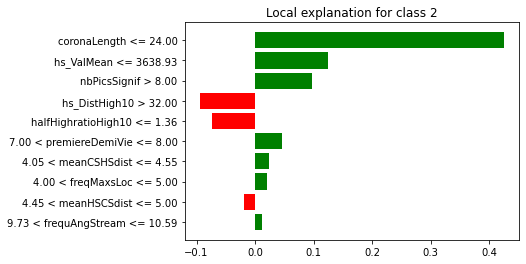

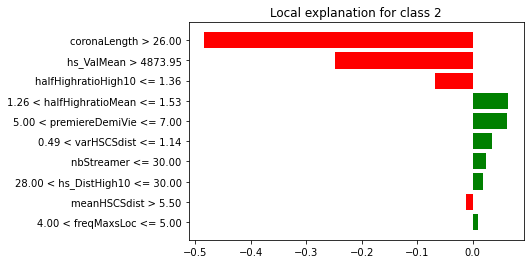

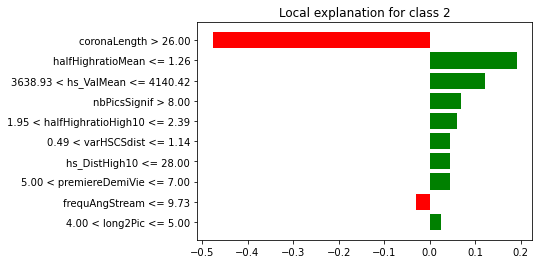

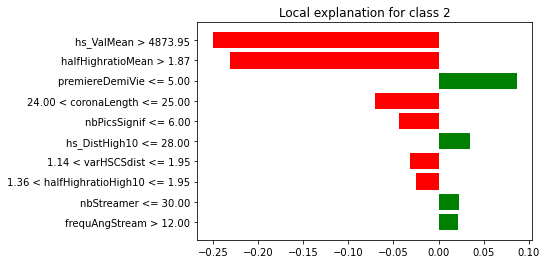

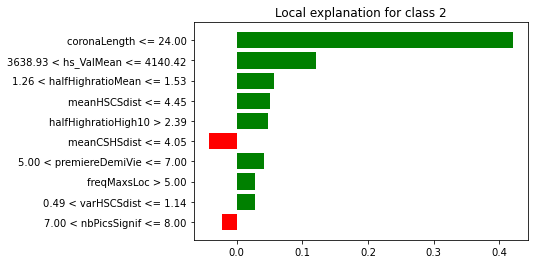

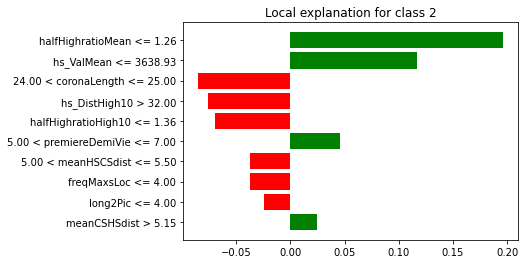

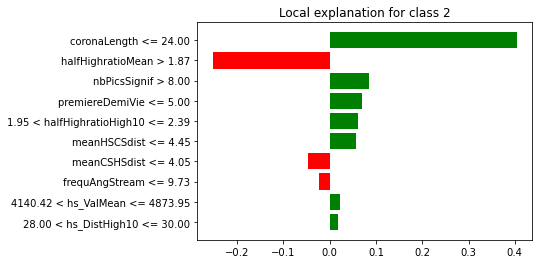

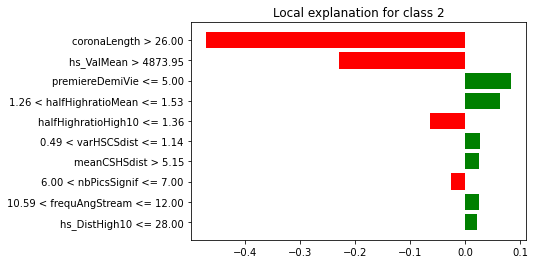

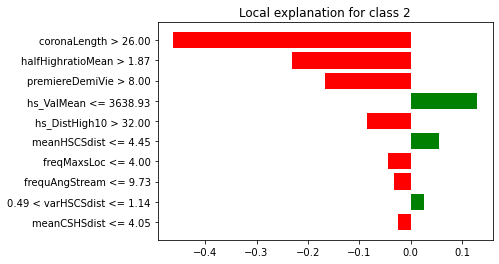

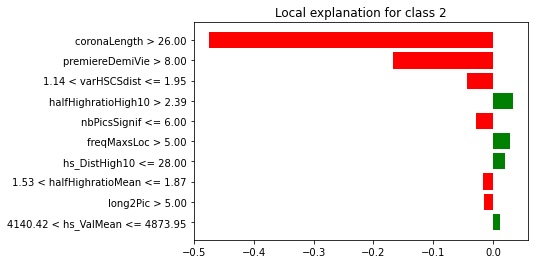

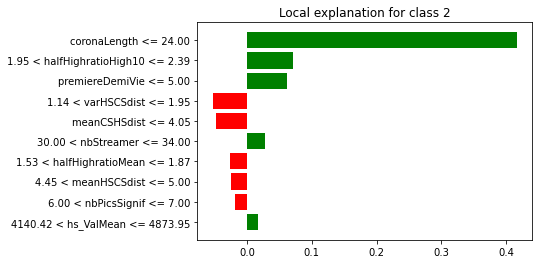

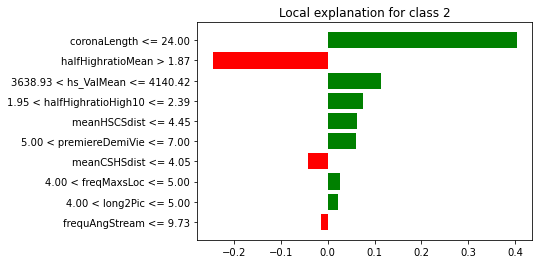

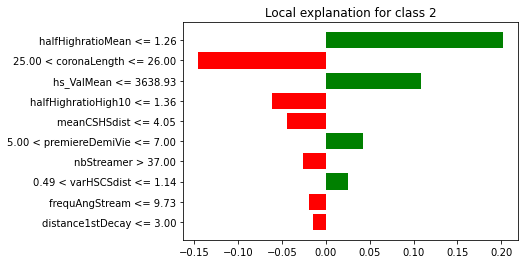

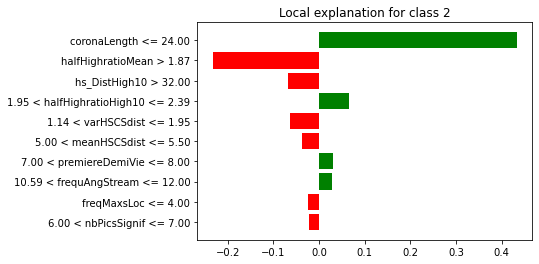

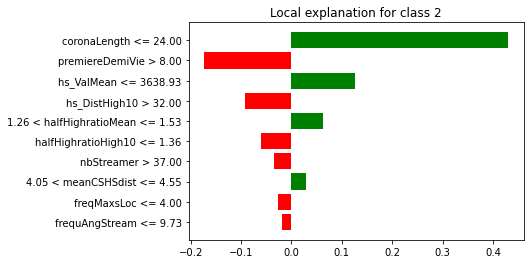

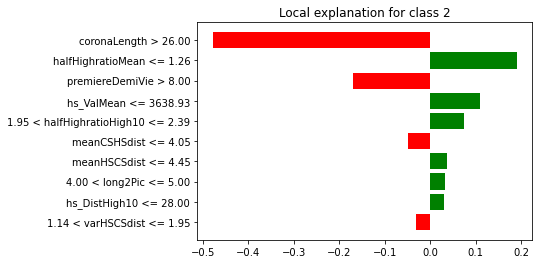

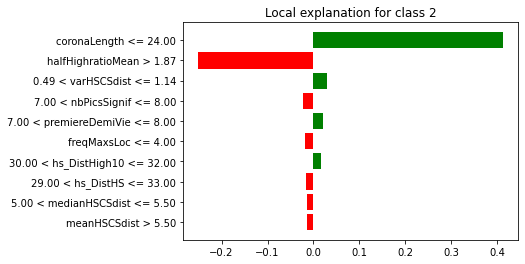

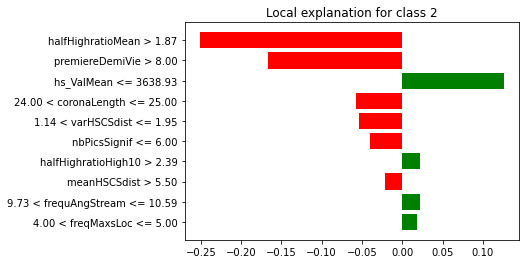

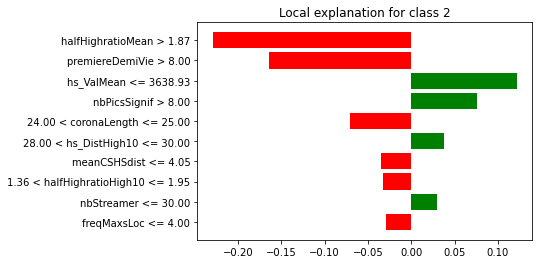

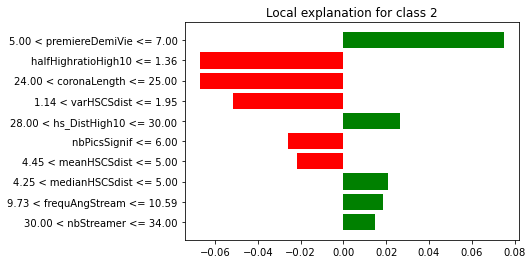

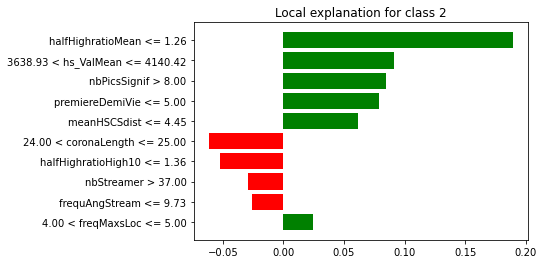

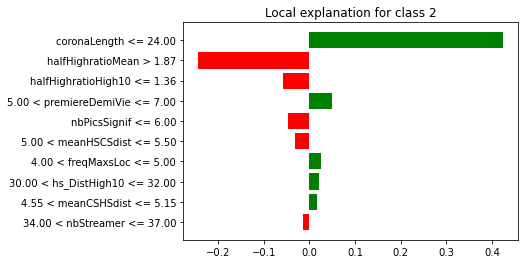

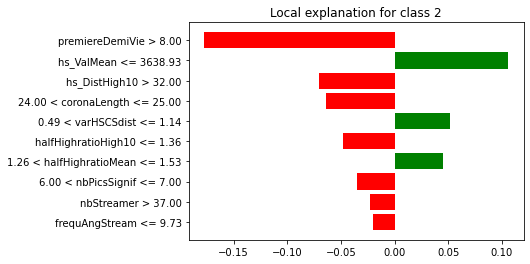

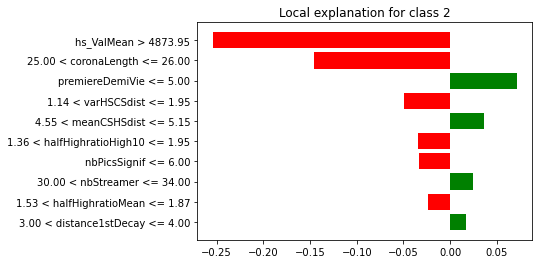

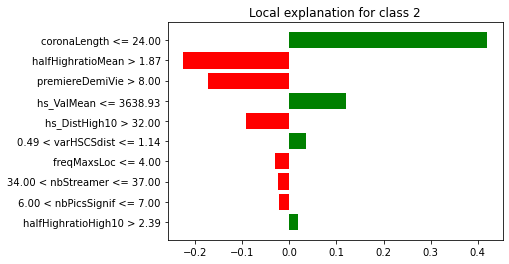

In [97]:
for i in range(len(y_test)):
    print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", np.max(predicted_prob[i]))
    explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names=np.unique(y_train), mode="classification")
    explained = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10)
    explained.as_pyplot_figure()
   

In [45]:
temp = formes.sub(formes.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs

formes= temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonnetemp = X.sub(X.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
formes

,premiereDemiVie,deuxiemeDemiVie,nbDeperd95,nbStreamer,frequAngStream,distance1stDecay,firstDecay,nbPicsSignif,ampl1Pic,long1Pic,...,medianRatioSlopeHigh10,meanHSCSdist,medianHSCSdist,stdHSCSdist,varHSCSdist,meanCSHSdist,medianCSHSdist,stdCSHSdist,varCSHSdist,lineHSStdToCircleHS
0,1.081995,-0.929341,-0.508046,-0.495307,0.163642,-0.345703,0.651476,-1.205558,0.683071,-0.454527,...,0.272916,0.176212,0.401553,-1.237657,-0.846273,-0.401549,-0.026091,-1.292926,-0.962357,0.661884
1,1.617457,-1.658559,-0.138810,-0.744837,0.341118,-0.345703,-0.592320,0.265444,-0.969919,-0.454527,...,-1.456803,0.484582,-0.587456,1.777337,1.660726,1.034669,0.469640,0.684450,0.481744,1.434456
2,-0.524390,1.258312,-1.061900,-0.495307,0.163642,-0.345703,0.678317,-0.224890,1.634198,-0.454527,...,0.713049,0.484582,0.154300,0.431438,0.201350,0.609123,0.717506,0.009662,-0.159150,-0.827120
3,0.546533,0.164485,-0.877282,-0.495307,0.163642,-0.345703,0.868640,-1.205558,0.904871,-0.454527,...,-0.454609,0.998532,0.896057,-0.785101,-0.645609,-0.295163,0.221775,-0.454522,-0.510945,-0.076623
4,2.286784,-1.293950,-1.061900,-1.243896,0.755228,-0.345703,-0.138054,-0.715224,-0.185730,-0.454527,...,-0.174965,1.975038,1.637814,0.765232,0.512119,1.779375,1.956835,1.696154,1.730095,1.822872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,-1.059852,1.622920,-0.323428,0.502812,-0.404280,-0.345703,-1.081522,-0.224890,-0.467626,0.708014,...,-0.051700,-0.337739,-0.587456,-0.821118,-0.663851,-0.933482,-0.769689,-1.160092,-0.906627,-0.900403
129,-0.658256,0.893703,0.784279,1.001871,-0.625139,1.357206,-1.058452,-0.224890,-0.995685,0.708014,...,-0.293270,-2.290750,-2.070970,0.932807,0.680859,0.183577,0.469640,0.705343,0.504036,-0.518332
130,-0.390525,1.258312,-1.061900,-0.994366,0.537275,-0.345703,1.951376,-1.205558,1.156435,-0.454527,...,0.742080,0.690162,1.143309,1.209366,0.977946,1.141056,0.469640,0.059160,-0.117352,-1.097904
131,0.144937,0.164485,-0.138810,-0.994366,0.537275,-0.345703,0.229653,0.265444,0.165704,-0.454527,...,-0.388473,0.433187,0.896057,-0.037843,-0.178479,-0.986675,-0.769689,0.495371,0.286690,-0.163766


In [59]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)


In [60]:
newdf

,mean,std,variance,entropy,entropylog,entropyRatio,fftPhaseEntropy,fftPowerEntropy,fftPhaseEntropylog,fftPowerEntropylog,...,varRatiosZones45,ecartMaxRatiosZones45,sumEntropyCircle,sumEntropyLine,sumEntropyLog2Circle,sumEntropyLog2Line,ratioSumEntropyCircle,ratioSumEntropyLine,lineHSStdToCircleHS,classe
0,867.780090,1744.230957,3042341.50,6.839094,9.925691,1.451317,12.374945,10.315221,16.502548,15.466156,...,0.001294,0.092669,7.720607,7.197406,10.921668,9.787198,1.414613,1.359823,6.840497,0
1,940.537292,2160.309814,4666938.50,6.882246,10.119940,1.470441,12.374517,10.315221,16.502335,15.467292,...,0.013324,0.272011,7.819699,7.179187,11.014341,9.779164,1.408538,1.362155,9.217333,0
2,1145.083740,2313.279785,5351263.00,7.040055,10.146494,1.441252,12.374945,10.315221,16.502548,15.467132,...,0.002790,0.121074,7.603540,7.206317,10.804644,9.794842,1.421002,1.359202,2.259541,0
3,1041.750732,2190.050781,4796322.50,6.992325,10.114056,1.446451,12.373846,10.315221,16.501999,15.467621,...,0.007711,0.236102,7.688960,7.216693,10.891717,9.804890,1.416540,1.358640,4.568461,0
4,916.608582,1649.551880,2721021.50,7.136492,10.424704,1.460760,12.374640,10.315221,16.502396,15.466766,...,0.009832,0.259111,7.954650,7.196368,11.188713,9.789549,1.406563,1.360346,10.412302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,728.784180,1727.865356,2985518.75,6.519295,9.325912,1.430509,12.375189,10.315221,16.502671,15.467720,...,0.002276,0.137219,7.364218,7.170092,10.489361,9.771655,1.424369,1.362835,2.034085,1
129,787.834839,1939.955566,3763427.75,6.582254,9.424251,1.431767,12.374517,10.315190,16.502335,15.467640,...,0.004093,0.152982,7.543969,7.193378,10.750377,9.790349,1.425029,1.361023,3.209534,1
130,1241.065796,2462.550781,6064156.00,7.079942,10.279897,1.451975,12.373541,10.315221,16.501847,15.467353,...,0.002689,0.124461,7.640711,7.230610,10.854523,9.813642,1.420617,1.357236,1.426467,1
131,868.085083,1876.265747,3520373.00,6.767041,9.687493,1.431570,12.375067,10.315221,16.502609,15.467193,...,0.002885,0.117008,7.604822,7.202838,10.805937,9.792711,1.420932,1.359563,4.300365,1


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

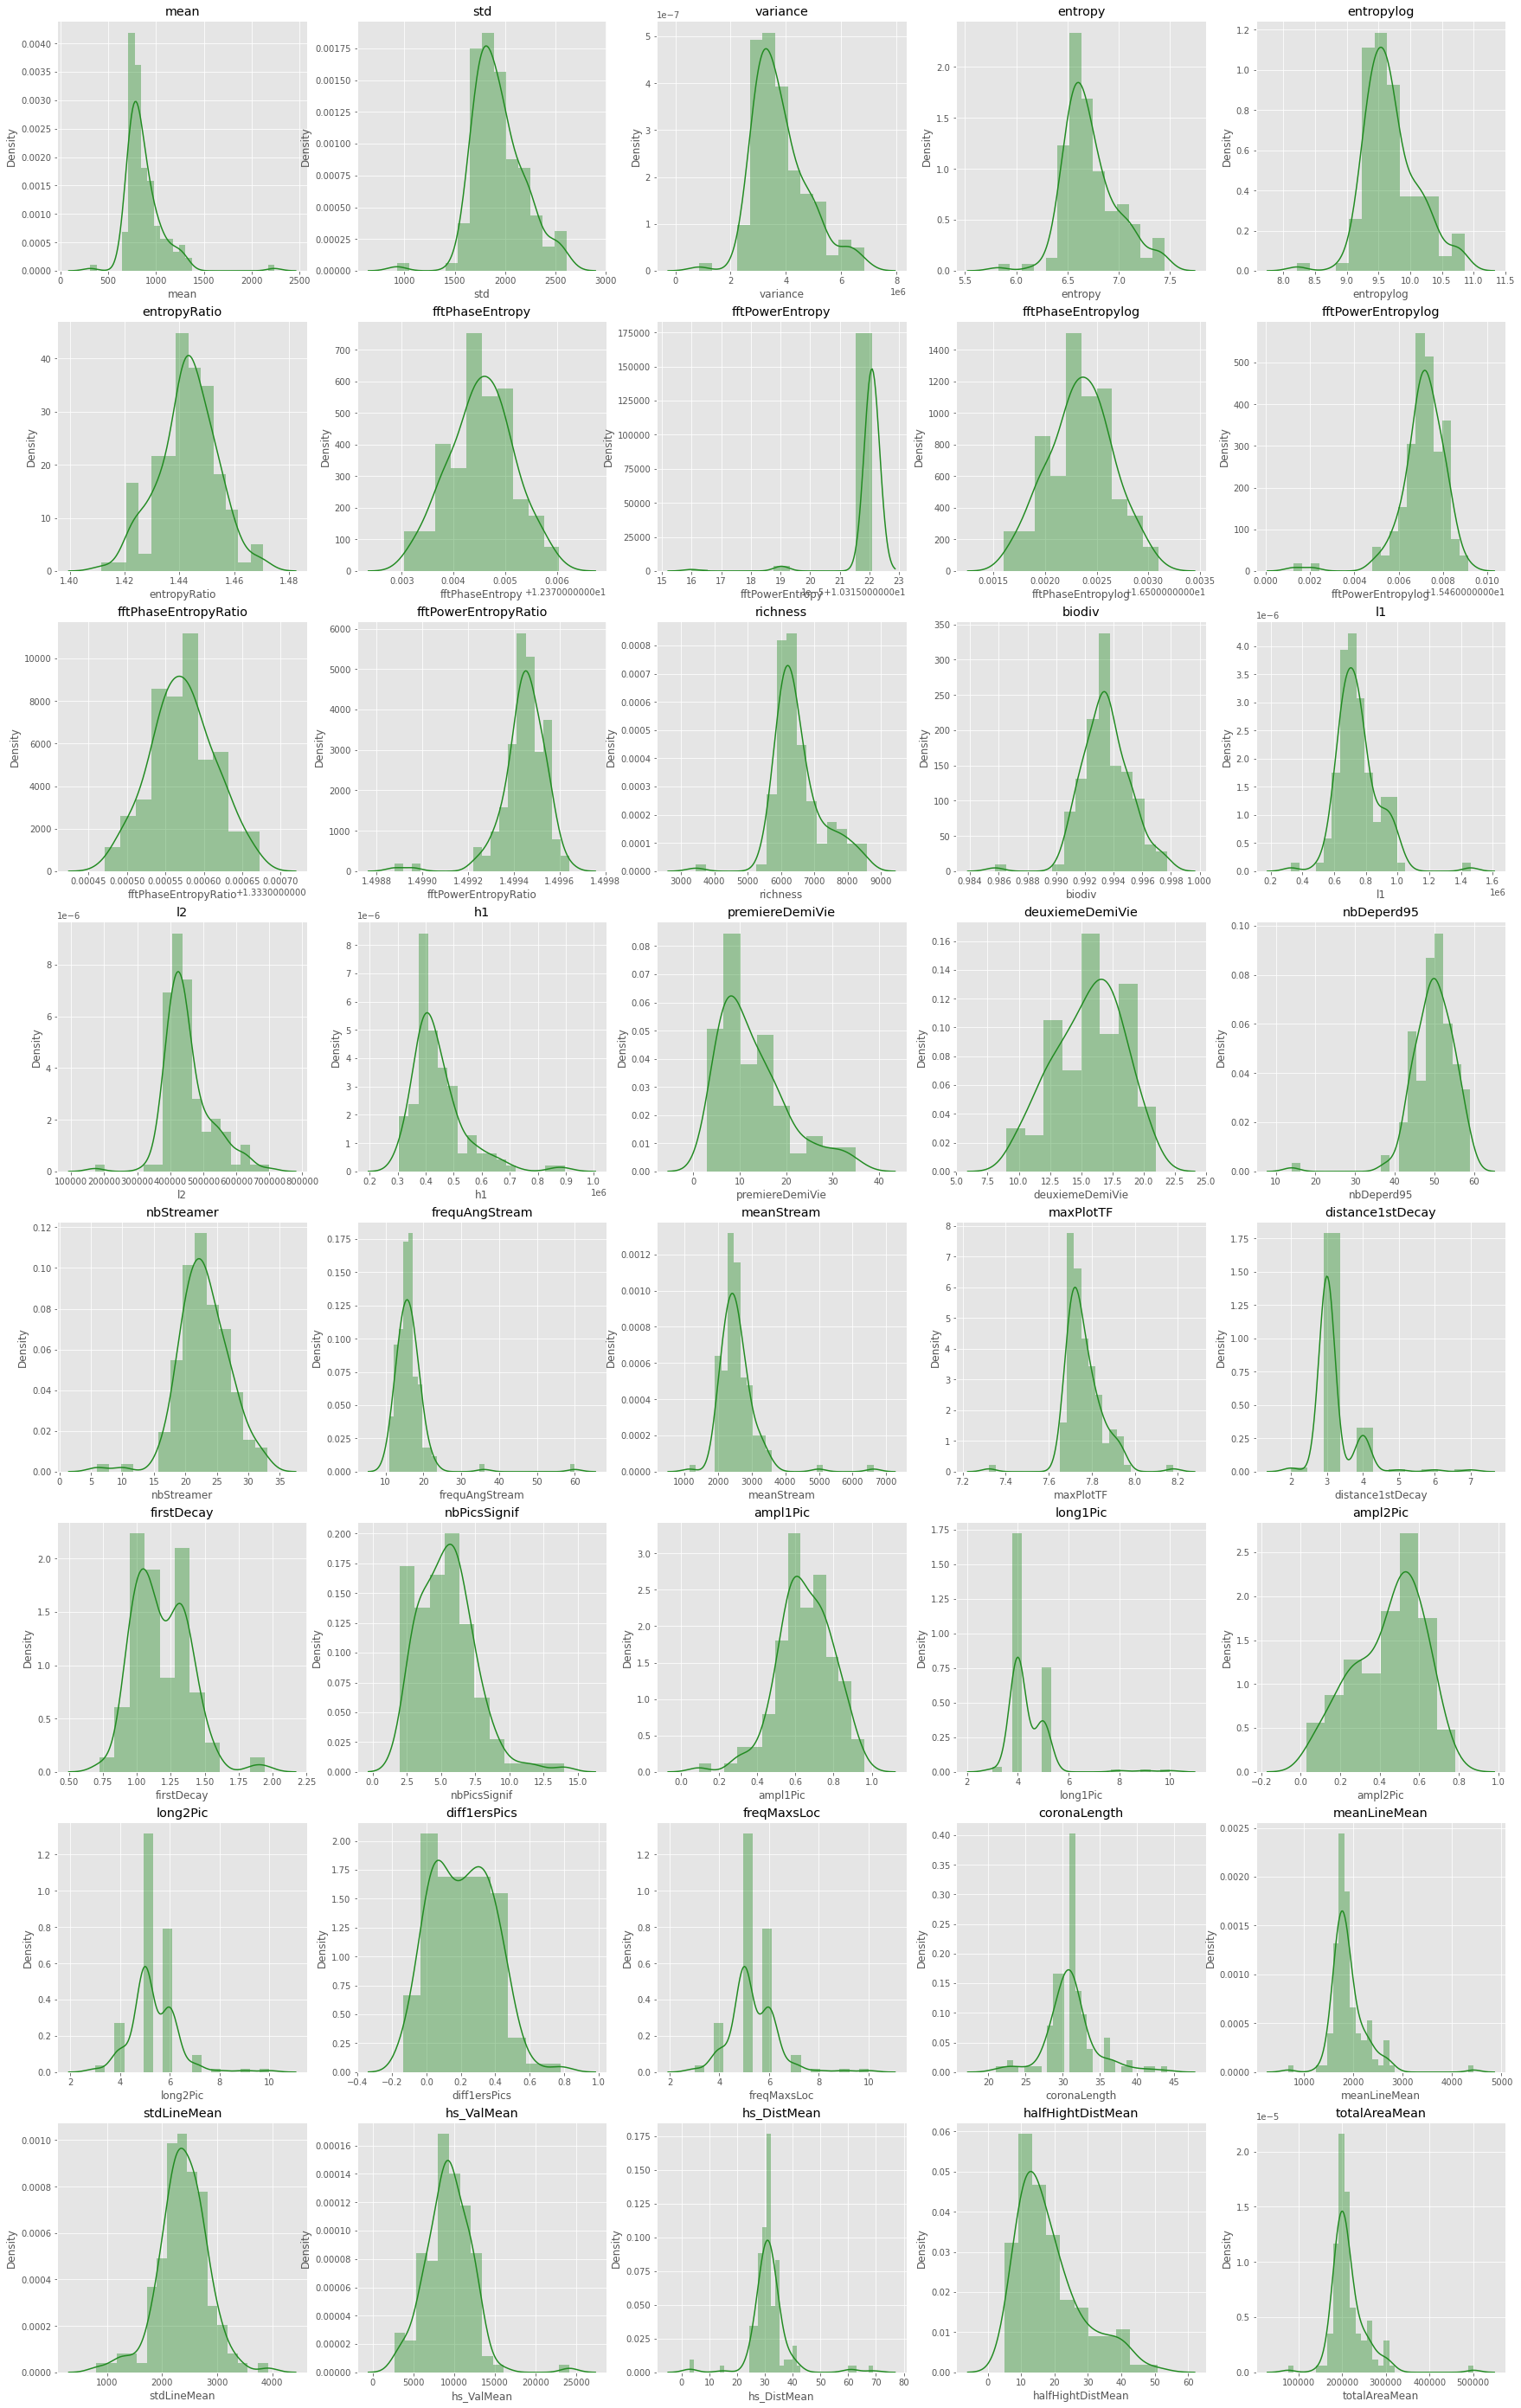

In [61]:
fig, axes = plt.subplots(nrows = 8, ncols = 5)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 50)

for ax, col in zip(axes, newdf.columns):
  sns.distplot(newdf[col], ax = ax, color='forestgreen')
  ax.set_title(col)

In [62]:
mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

/var/folders/8x/5glvyl755hzfmfb0sr_8nfsr0000gn/T/ipykernel_3534/3833852466.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float


In [63]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

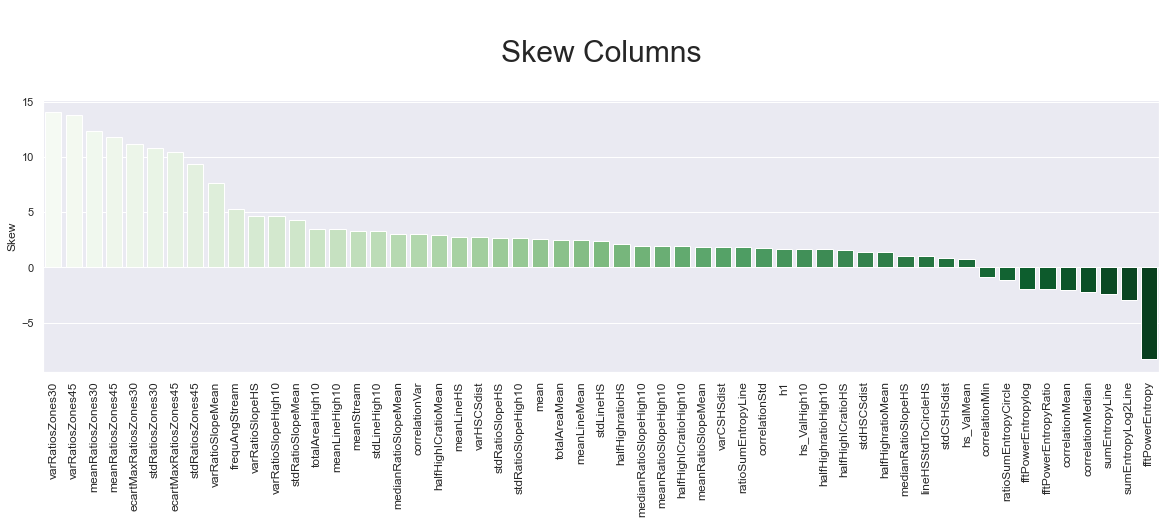

In [64]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x=skew_cols.index, y="Skew", data=skew_cols,palette="Greens",capsize=.2)
p.axes.set_title("\nSkew Columns\n",fontsize=30);


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

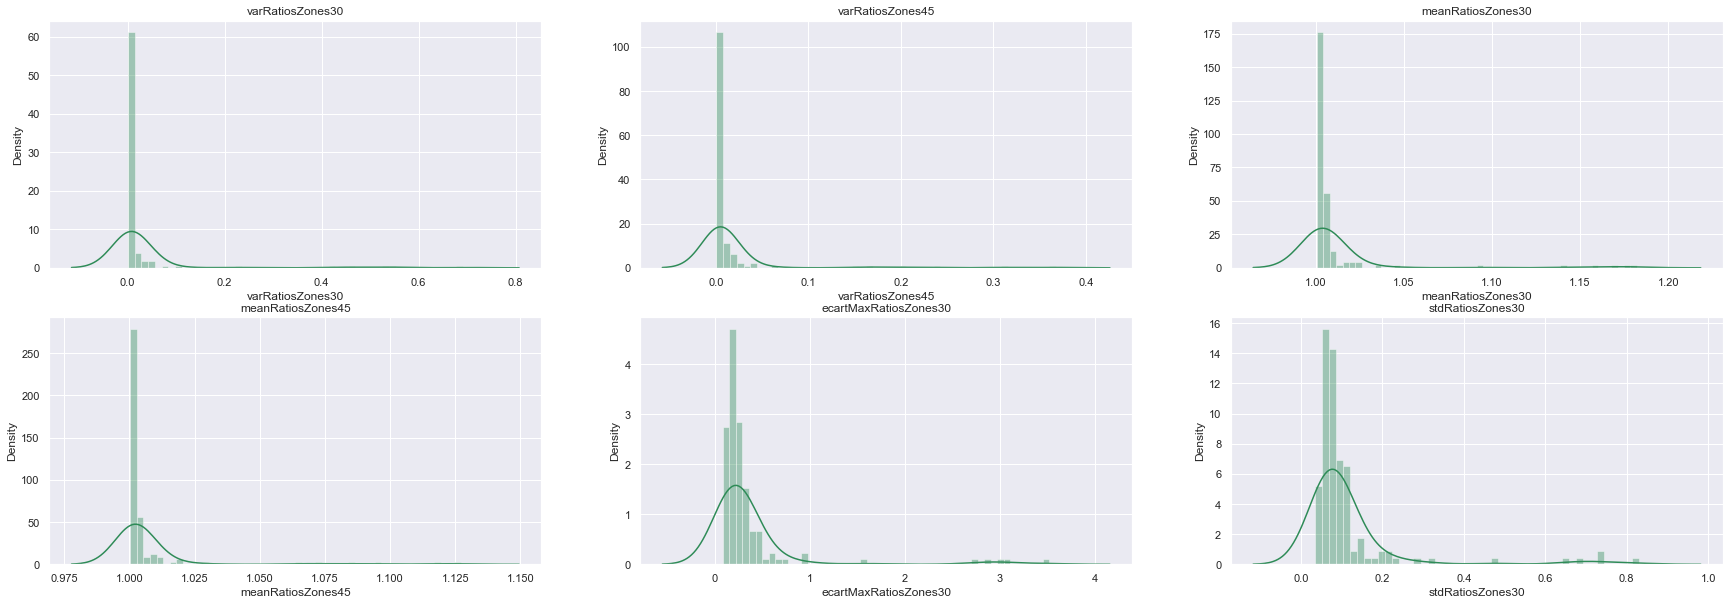

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 10)

for ax, col in zip(axes, skew_cols.index):
  sns.distplot(newdf[col], ax = ax, color='seagreen')
  ax.set_title(col)

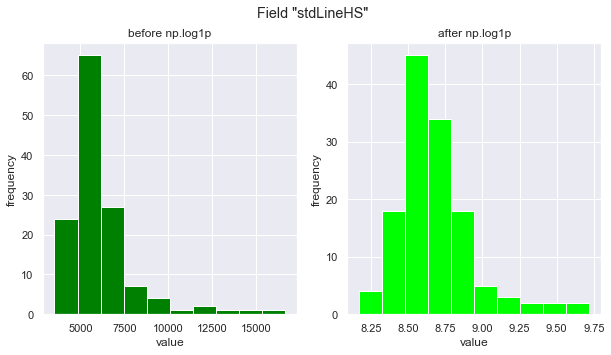

In [69]:
#Choose a field
field = "stdLineHS"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before,color='green')

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after,color='lime')

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [70]:
for col in skew_cols.index.values:
    if col == "classe":
        continue
    df[col] = df[col].apply(np.log1p)

In [71]:
df.shape

(133, 102)

In [77]:
smaller_df= df.loc[:,['halfHighratioHigh10', 'halfHightDistMean', 'ampl1Pic', 'frequAngStream', 'firstDecay', 'halfHighratioHS', 'halfHighICratioHS', 'medianCSHSdist', 'meanCSHSdist', 'coronaLength', 'ampl2Pic', 'hs_ValMean', 'stdRatioSlopeHigh10', 'distance1stDecay', 'nbDeperd95', 'varCSHSdist', 'varHSCSdist', 'meanHSCSdist','classe']]

In [78]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
halfHighratioHigh10,133.0,0.999299,0.421226,0.274499,0.704627,0.904126,1.283674,2.212312
halfHightDistMean,133.0,18.556391,9.749447,5.000000,12.000000,16.000000,23.000000,51.000000
ampl1Pic,133.0,0.650007,0.143204,0.093856,0.568483,0.641341,0.751174,0.960812
frequAngStream,133.0,2.831086,0.193488,2.477302,2.697741,2.812541,2.898277,4.110874
firstDecay,133.0,1.181297,0.200801,0.723660,1.029580,1.153575,1.321394,1.945330
halfHighratioHS,133.0,0.893677,0.527950,0.131952,0.460545,0.800130,1.257078,2.498073
halfHighICratioHS,133.0,0.703629,0.052250,0.571188,0.673297,0.698489,0.721537,0.957110
medianCSHSdist,133.0,5.776316,1.008610,2.750000,5.250000,5.750000,6.250000,9.000000
meanCSHSdist,133.0,5.977444,0.939968,3.500000,5.350000,5.850000,6.450000,8.950000
coronaLength,133.0,31.097744,3.336812,21.000000,30.000000,31.000000,32.000000,44.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

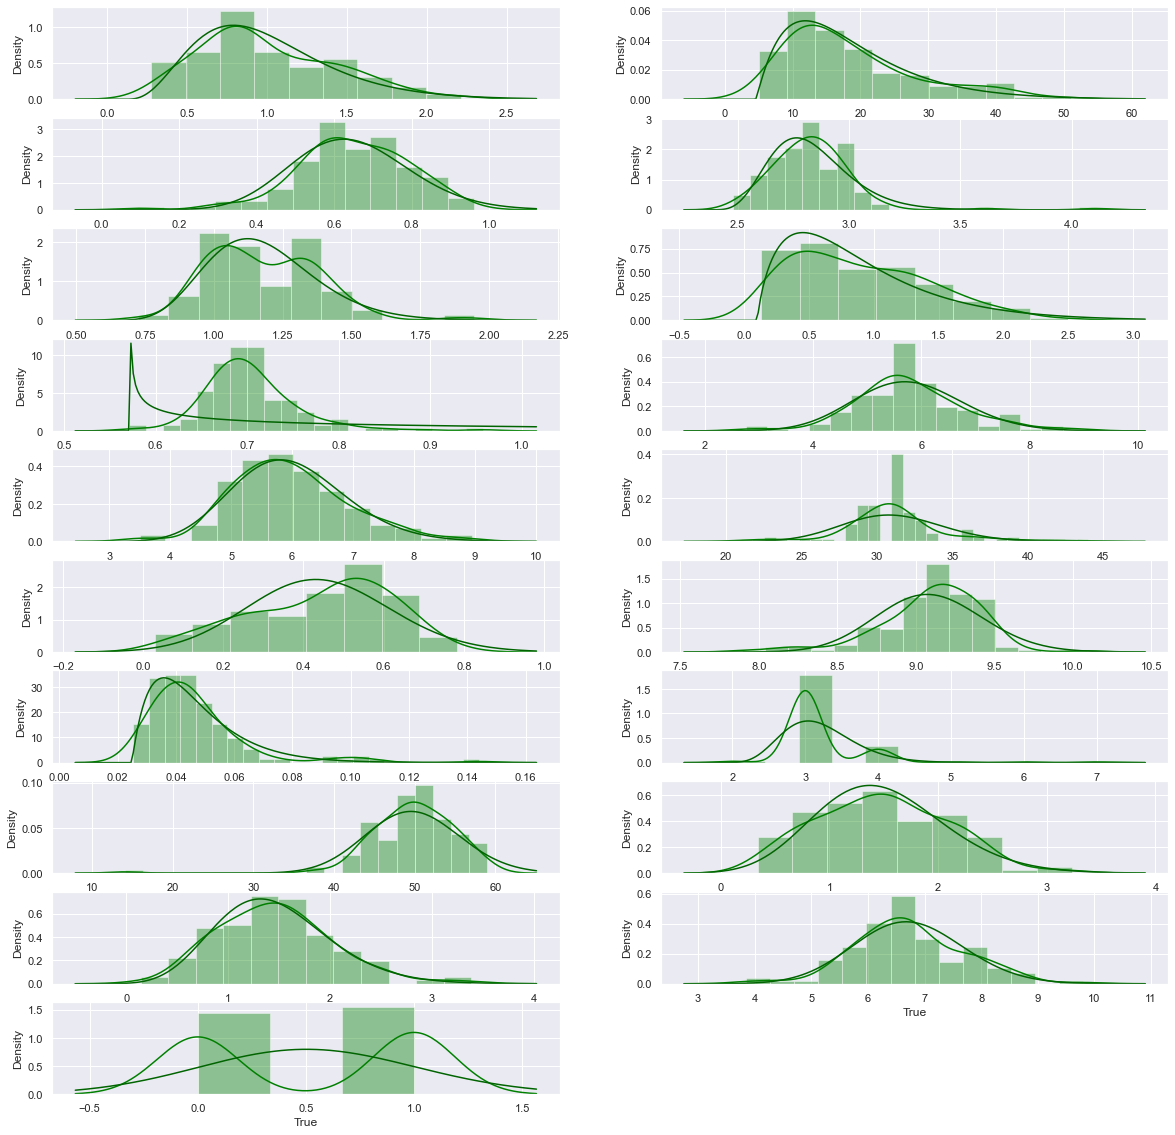

In [82]:
from scipy import stats
distplot_df=df.loc[:,['halfHighratioHigh10', 'halfHightDistMean', 'ampl1Pic', 'frequAngStream', 'firstDecay', 'halfHighratioHS', 'halfHighICratioHS', 'medianCSHSdist', 'meanCSHSdist', 'coronaLength', 'ampl2Pic', 'hs_ValMean', 'stdRatioSlopeHigh10', 'distance1stDecay', 'nbDeperd95', 'varCSHSdist', 'varHSCSdist', 'meanHSCSdist','classe']]

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(10,2,i)
    sns.distplot(distplot_df[column], color="green",fit_kws={"color":"darkgreen"},fit=stats.gamma,kde=True,axlabel=True)

In [84]:
distplot_df.dtypes

halfHighratioHigh10    float64
halfHightDistMean        int64
ampl1Pic               float64
frequAngStream         float64
firstDecay             float64
halfHighratioHS        float64
halfHighICratioHS      float64
medianCSHSdist         float64
meanCSHSdist           float64
coronaLength             int64
ampl2Pic               float64
hs_ValMean             float64
stdRatioSlopeHigh10    float64
distance1stDecay         int64
nbDeperd95               int64
varCSHSdist            float64
varHSCSdist            float64
meanHSCSdist           float64
classe                   int64
dtype: object

In [101]:
X = smaller_df.loc[:,['halfHighratioHigh10', 'halfHightDistMean', 'ampl1Pic', 'frequAngStream', 'firstDecay', 'halfHighratioHS', 'halfHighICratioHS', 'medianCSHSdist', 'meanCSHSdist', 'coronaLength', 'ampl2Pic', 'hs_ValMean', 'stdRatioSlopeHigh10', 'distance1stDecay', 'nbDeperd95', 'varCSHSdist', 'varHSCSdist', 'meanHSCSdist']]

y = smaller_df['classe']

In [107]:
X2 = X.copy()
X2['OQ2'] = X2['nbDeperd95'] ** 3


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


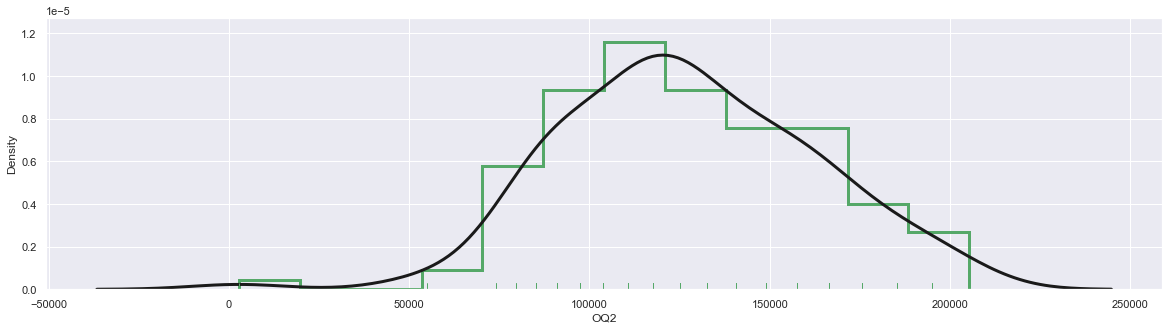

In [108]:
ax = sns.distplot(X2['OQ2'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [110]:
X3 = X2.copy()

# multiplicative interaction
X3['dD_x_n95'] = X3['distance1stDecay'] * X3['nbDeperd95']

# division interaction
X3['dD_/_CL'] = X3['distance1stDecay'] / X3['coronaLength']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


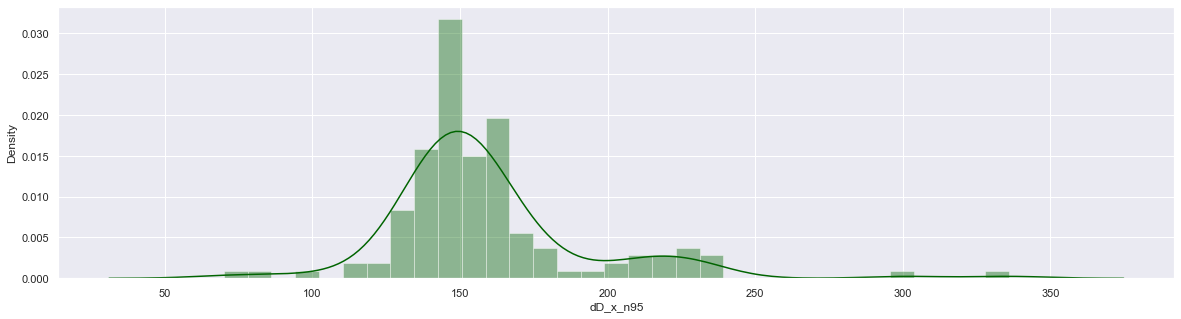

In [111]:
ax = sns.distplot(X3['dD_x_n95'],color='darkgreen')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


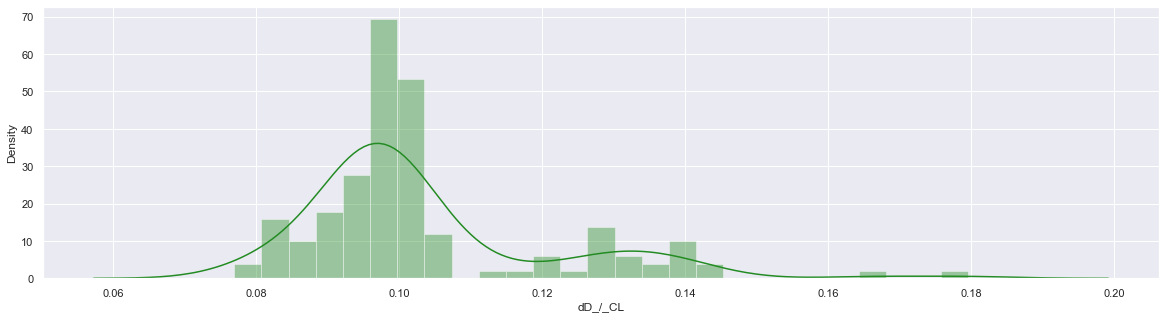

In [112]:
ax = sns.distplot(X3['dD_/_CL'],color='forestgreen')

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data

X = formes
y = dtf['Y']
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=3) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Text(0.5, 0, 'PC3')

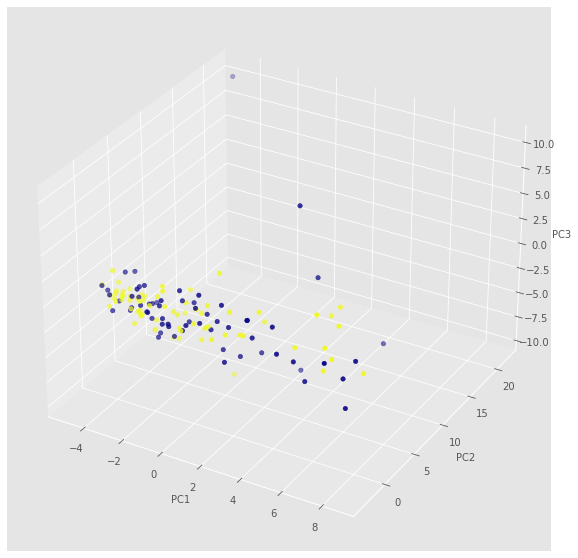

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(X_new[:,0],X_new[:,1],X_new[:,2], c=y, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [48]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca = PCA(n_components = 2)
  
X1_train = pca.fit_transform(X1_train)
X1_test = pca.transform(X1_test)  


In [49]:
from sklearn.linear_model import LogisticRegression  
  
classifi = LogisticRegression(random_state = 0)
classifi.fit(X1_train, y1_train)
y_pred = classifi.predict(X1_test)
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y1_test, y_pred))
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y1_test, y_pred)

0.5555555555555556


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


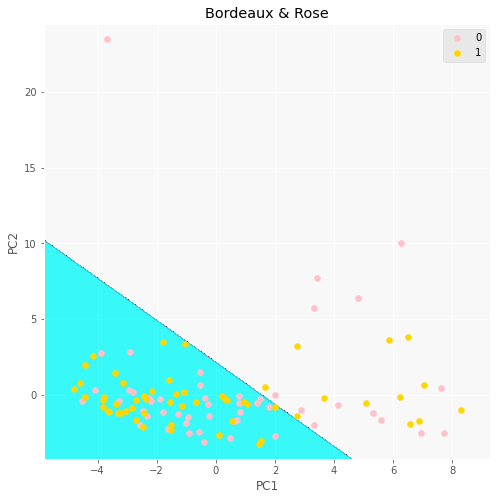

In [50]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))

X_set, y_set = X1_train, y1_train

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('white', 'grey','green','purple', 'brown','deeppink','aqua')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink','gold','purple','blue','black','greenyellow','white'))(i), label = j)

# labelling the graphe
plt.title('Bordeaux & Rose')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


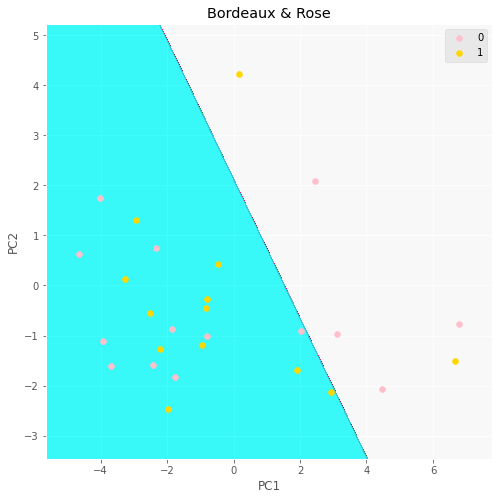

In [51]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))

X_set, y_set = X1_test, y1_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('white', 'grey','green','purple', 'brown','deeppink','aqua')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink','gold','purple','blue','black','greenyellow','white'))(i), label = j)

# labelling the graphe
plt.title('Bordeaux & Rose')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [52]:
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X1_train, y1_train)

# testing the model
y_pred = classifier1.predict(X1_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y1_test, y_pred))

0.48148148148148145


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


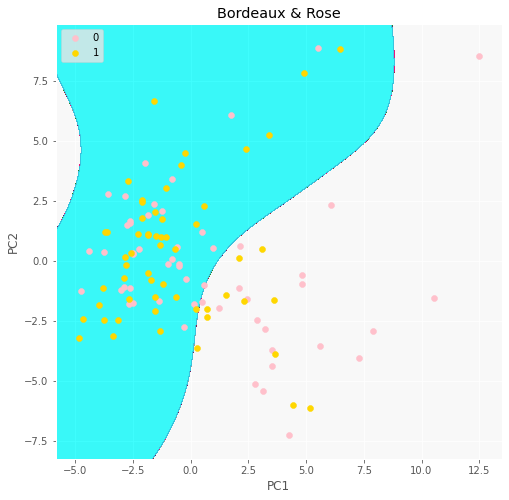

In [90]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))

X_set, y_set = X1_train, y1_train

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('white', 'grey','green','purple', 'brown','deeppink','aqua')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink','gold','purple','blue','black','greenyellow','white'))(i), label = j)

# labelling the graphe
plt.title('Bordeaux & Rose')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


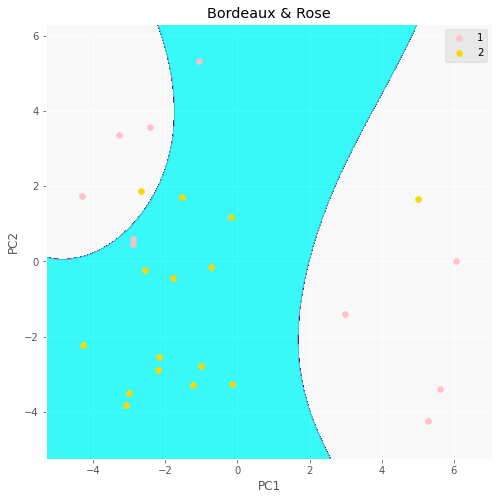

In [111]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))

X_set, y_set = X1_test, y1_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('white', 'grey','green','purple', 'brown','deeppink','aqua')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink','gold','purple','blue','black','greenyellow','white'))(i), label = j)

# labelling the graphe
plt.title('Bordeaux & Rose')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
rnd1_clf = RandomForestClassifier(n_estimators=150)
rnd1_clf.fit(X1_train, y1_train)
y_pred = rnd1_clf.predict(X1_test)
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y1_test, y_pred))

0.37037037037037035


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


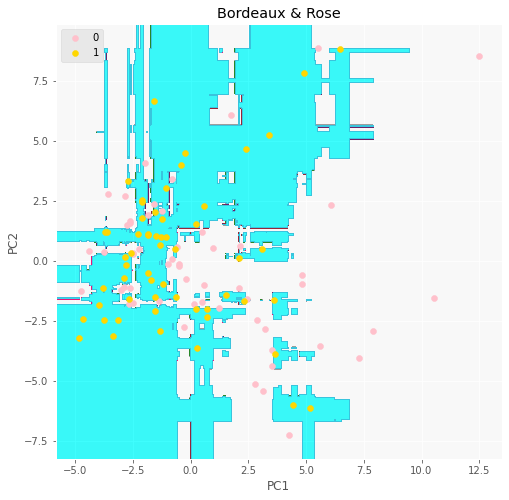

In [92]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))

X_set, y_set = X1_train, y1_train

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rnd1_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('white', 'grey','green','purple', 'brown','deeppink','aqua')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink','gold','purple','blue','black','greenyellow','white'))(i), label = j)

# labelling the graphe
plt.title('Bordeaux & Rose')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


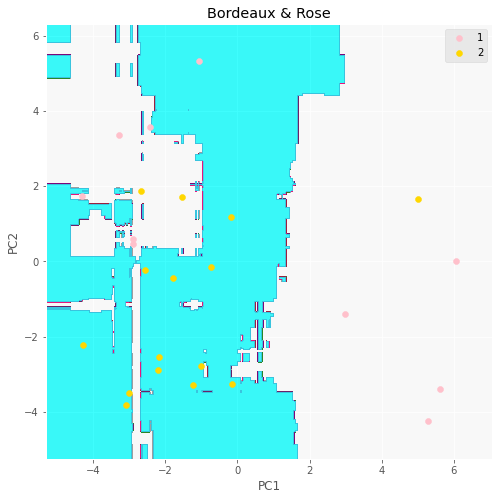

In [113]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (8,8))

X_set, y_set = X1_test, y1_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rnd1_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('white', 'grey','green','purple', 'brown','deeppink','aqua')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink','gold','purple','blue','black','greenyellow','white'))(i), label = j)

# labelling the graphe
plt.title('Bordeaux & Rose')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<AxesSubplot:>

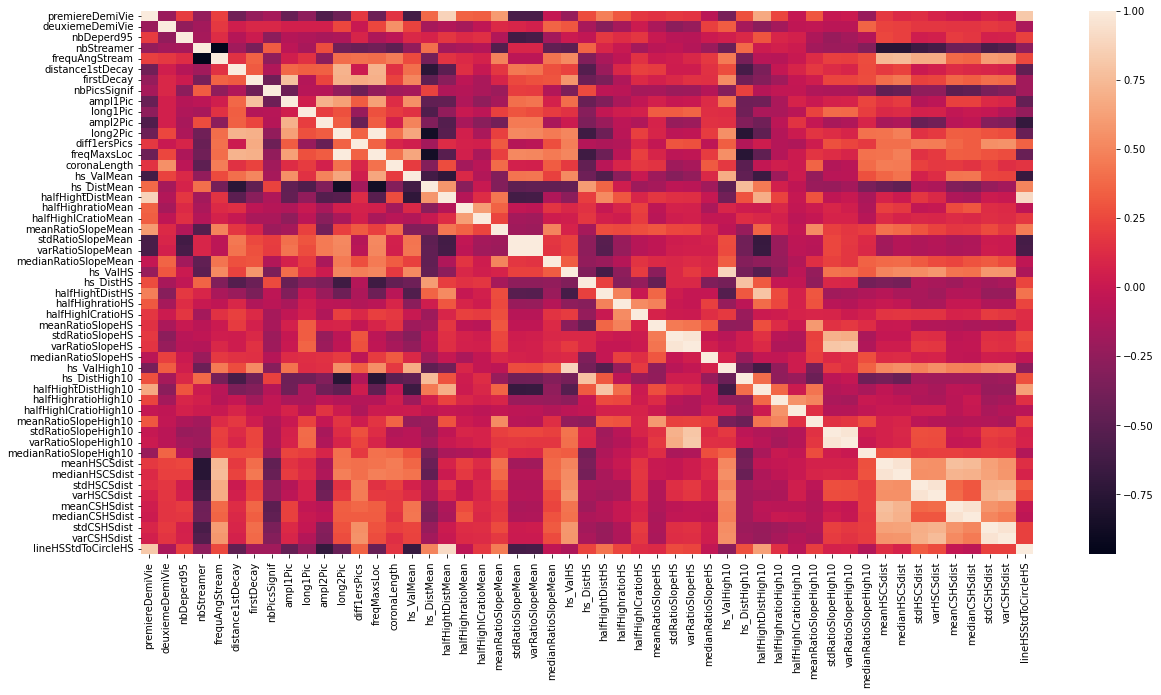

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df[formes.columns].corr())

<Figure size 3600x3600 with 0 Axes>

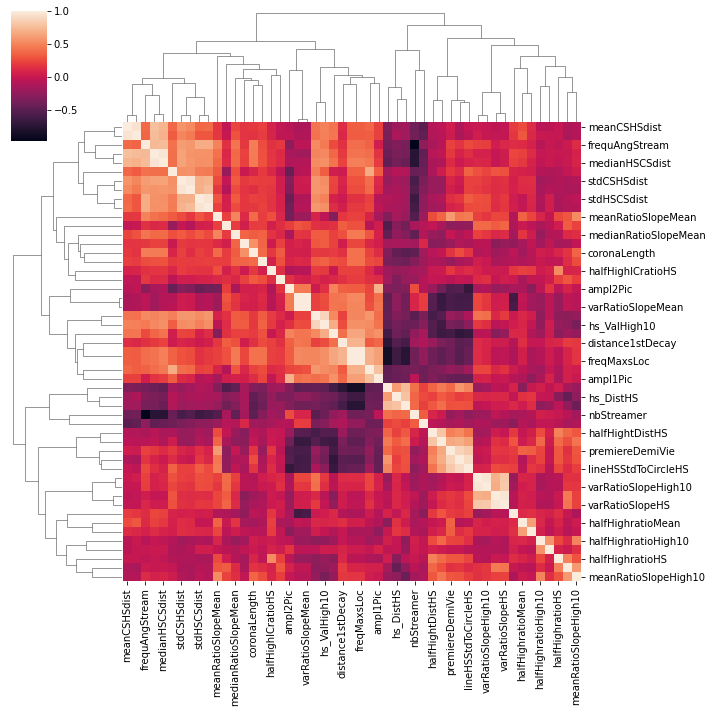

In [40]:
plt.figure(figsize=(50,50))
sns.clustermap(df[formes.columns].corr())

<AxesSubplot:>

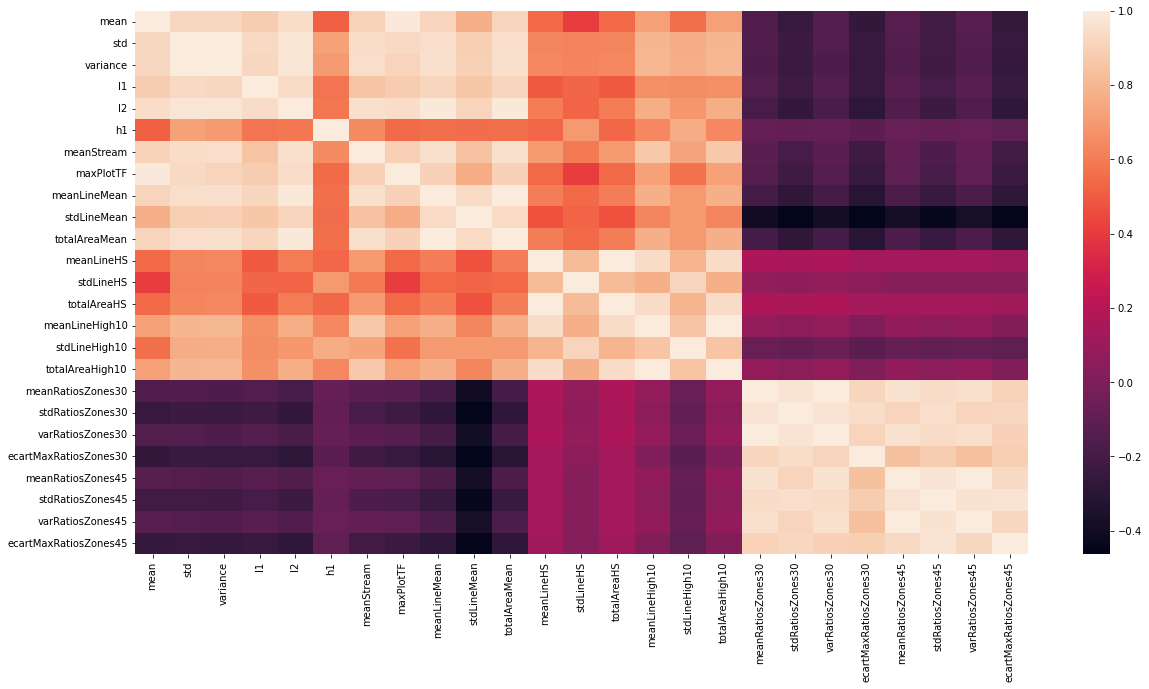

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df[intensite.columns].corr())

<Figure size 3600x3600 with 0 Axes>

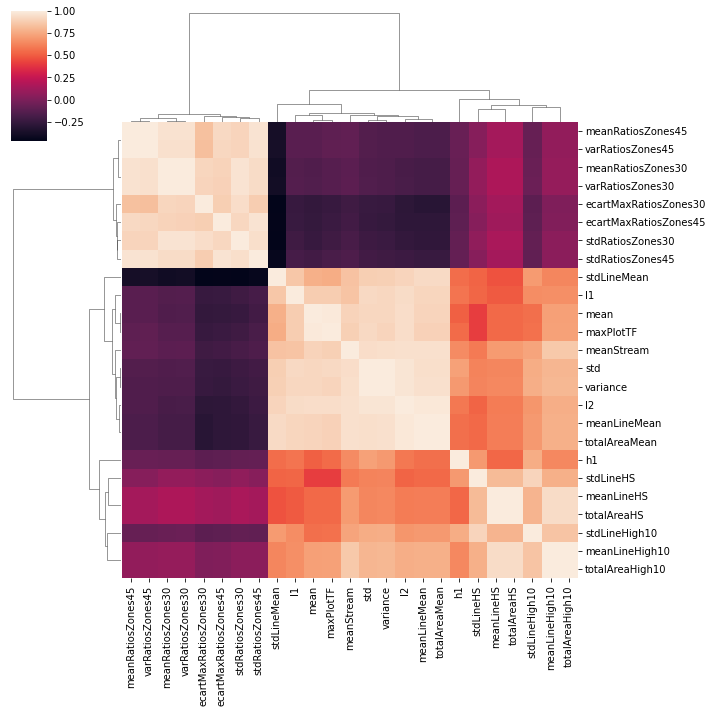

In [42]:
plt.figure(figsize=(50,50))
sns.clustermap(df[intensite.columns].corr())

<AxesSubplot:>

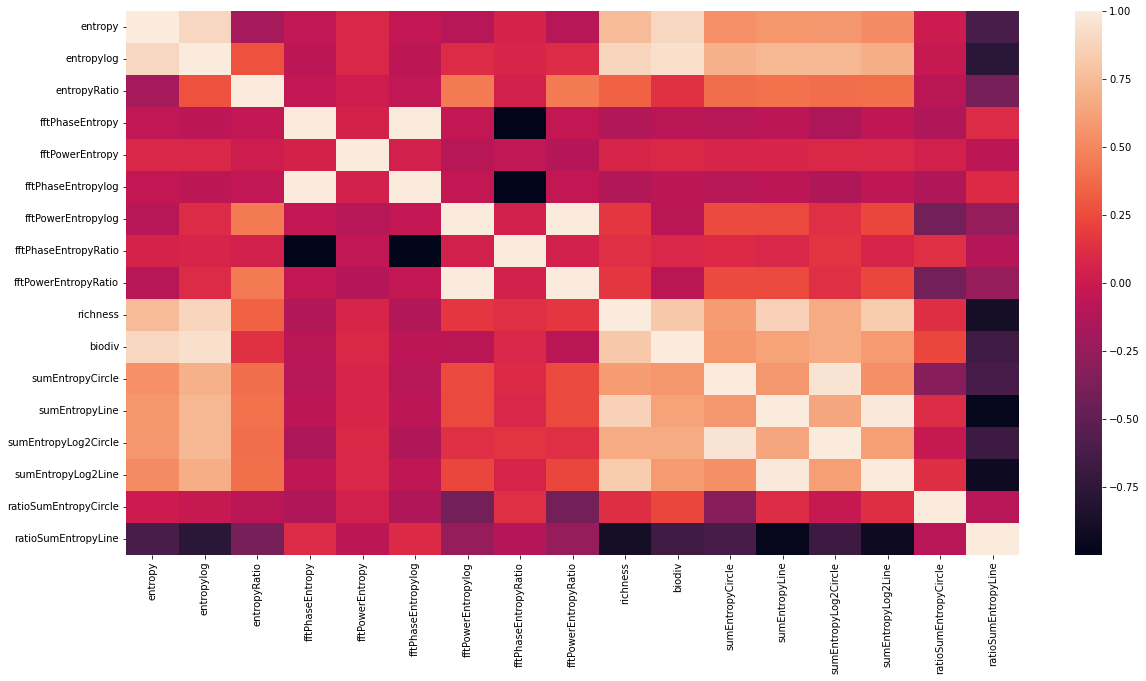

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(df[entropie.columns].corr())

<Figure size 3600x3600 with 0 Axes>

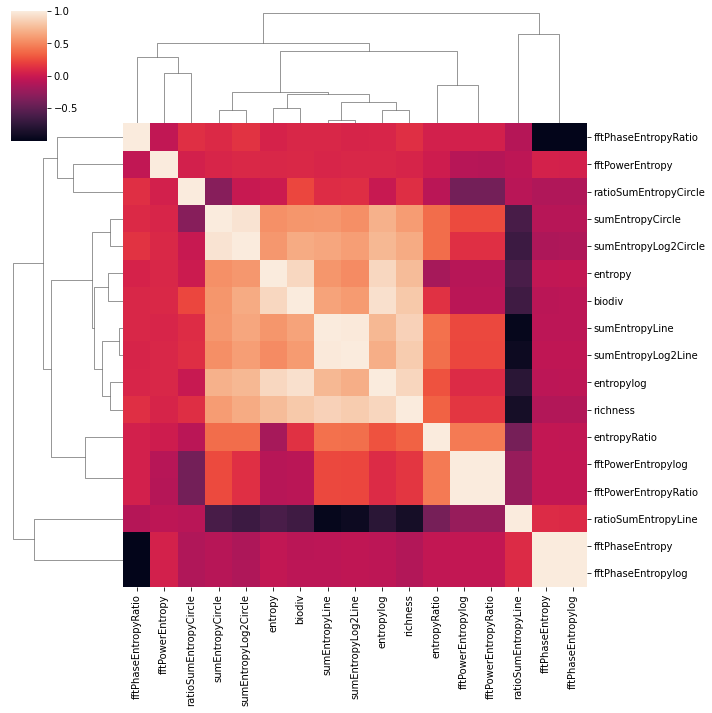

In [44]:
plt.figure(figsize=(50,50))
sns.clustermap(df[entropie.columns].corr())

<AxesSubplot:>

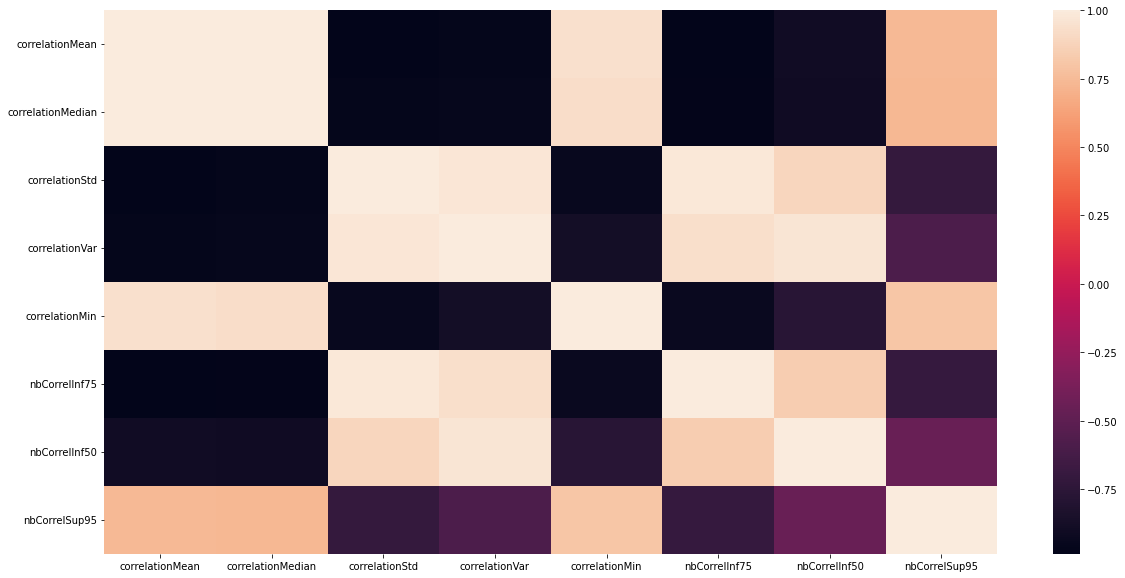

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df[correlation.columns].corr())

<Figure size 3600x3600 with 0 Axes>

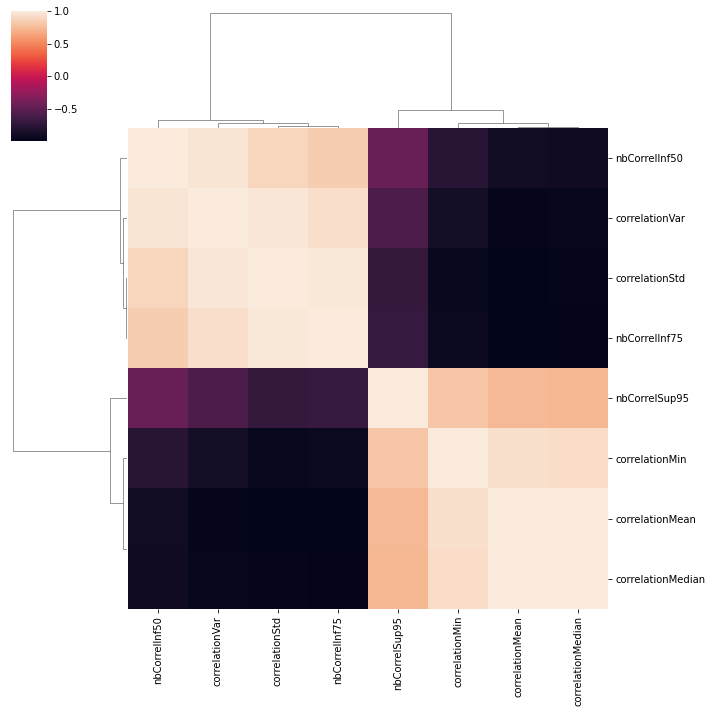

In [46]:
plt.figure(figsize=(50,50))
sns.clustermap(df[correlation.columns].corr())

In [47]:
from scipy.stats import ttest_ind

In [48]:
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(bordeaux_df[col].dropna(), cahors_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [49]:
for col in intensite.columns:
    print(f'{col :-<50} {t_test(col)}')

mean---------------------------------------------- H0 Rejetée
std----------------------------------------------- H0 Rejetée
variance------------------------------------------ H0 Rejetée
l1------------------------------------------------ H0 Rejetée
l2------------------------------------------------ H0 Rejetée
h1------------------------------------------------ H0 Rejetée
meanStream---------------------------------------- H0 Rejetée
maxPlotTF----------------------------------------- H0 Rejetée
meanLineMean-------------------------------------- H0 Rejetée
stdLineMean--------------------------------------- H0 Rejetée
totalAreaMean------------------------------------- H0 Rejetée
meanLineHS---------------------------------------- H0 Rejetée
stdLineHS----------------------------------------- H0 Rejetée
totalAreaHS--------------------------------------- H0 Rejetée
meanLineHigh10------------------------------------ H0 Rejetée
stdLineHigh10------------------------------------- H0 Rejetée
totalAre

In [50]:
for col in entropie.columns:
    print(f'{col :-<50} {t_test(col)}')

entropy------------------------------------------- H0 Rejetée
entropylog---------------------------------------- H0 Rejetée
entropyRatio-------------------------------------- 0
fftPhaseEntropy----------------------------------- 0
fftPowerEntropy----------------------------------- 0
fftPhaseEntropylog-------------------------------- 0
fftPowerEntropylog-------------------------------- 0
fftPhaseEntropyRatio------------------------------ 0
fftPowerEntropyRatio------------------------------ 0
richness------------------------------------------ H0 Rejetée
biodiv-------------------------------------------- H0 Rejetée
sumEntropyCircle---------------------------------- H0 Rejetée
sumEntropyLine------------------------------------ H0 Rejetée
sumEntropyLog2Circle------------------------------ H0 Rejetée
sumEntropyLog2Line-------------------------------- H0 Rejetée
ratioSumEntropyCircle----------------------------- H0 Rejetée
ratioSumEntropyLine------------------------------- H0 Rejetée


In [51]:
for col in correlation.columns:
    print(f'{col :-<50} {t_test(col)}')

correlationMean----------------------------------- 0
correlationMedian--------------------------------- 0
correlationStd------------------------------------ 0
correlationVar------------------------------------ 0
correlationMin------------------------------------ 0
nbCorrelInf75------------------------------------- 0
nbCorrelInf50------------------------------------- 0
nbCorrelSup95------------------------------------- 0


In [52]:
for col in formes.columns:
    print(f'{col :-<50} {t_test(col)}')

premiereDemiVie----------------------------------- 0
deuxiemeDemiVie----------------------------------- H0 Rejetée
nbDeperd95---------------------------------------- 0
nbStreamer---------------------------------------- H0 Rejetée
frequAngStream------------------------------------ H0 Rejetée
distance1stDecay---------------------------------- 0
firstDecay---------------------------------------- H0 Rejetée
nbPicsSignif-------------------------------------- H0 Rejetée
ampl1Pic------------------------------------------ 0
long1Pic------------------------------------------ 0
ampl2Pic------------------------------------------ 0
long2Pic------------------------------------------ H0 Rejetée
diff1ersPics-------------------------------------- 0
freqMaxsLoc--------------------------------------- H0 Rejetée
coronaLength-------------------------------------- H0 Rejetée
hs_ValMean---------------------------------------- H0 Rejetée
hs_DistMean--------------------------------------- H0 Rejetée
halfHight

# TrainSet

In [43]:
df=formes.join(data1['classe'])
df


,premiereDemiVie,deuxiemeDemiVie,nbDeperd95,nbStreamer,frequAngStream,distance1stDecay,firstDecay,nbPicsSignif,ampl1Pic,long1Pic,...,meanHSCSdist,medianHSCSdist,stdHSCSdist,varHSCSdist,meanCSHSdist,medianCSHSdist,stdCSHSdist,varCSHSdist,lineHSStdToCircleHS,classe
0,4,9,47,34,10.588235,4,1.459443,6,0.891953,5,...,4.85,5.25,1.304799,1.7025,4.65,4.75,1.096586,1.2025,1.182381,1
1,7,11,51,34,10.588235,4,1.026649,6,0.737791,5,...,5.60,5.25,0.800000,0.6400,5.20,5.00,0.871780,0.7600,1.238166,1
2,4,13,52,31,11.612903,4,1.415605,7,0.715654,5,...,5.60,5.50,1.044031,1.0900,5.50,5.50,1.140175,1.3000,0.821579,1
3,15,11,47,38,9.473684,3,1.178739,7,0.643819,4,...,4.15,4.00,0.975961,0.9525,3.55,3.00,1.967867,3.8725,6.774243,1
4,5,12,50,31,11.612903,4,1.245909,6,0.782984,5,...,5.80,5.50,1.249000,1.5600,4.90,4.50,1.670329,2.7900,1.495299,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,7,12,51,40,9.000000,3,0.952308,8,0.628512,5,...,4.50,4.00,1.048809,1.1000,4.00,3.50,1.466288,2.1500,3.681400,2
118,18,10,44,23,15.652174,3,0.968452,9,0.377198,5,...,6.95,7.00,1.795132,3.2225,5.20,5.75,2.193171,4.8100,6.718589,2
119,4,10,46,41,8.780488,4,0.993916,8,0.745008,5,...,4.10,4.00,0.994987,0.9900,3.90,3.75,0.489898,0.2400,1.420865,2
120,8,8,49,35,10.285714,4,1.114979,5,0.700426,5,...,5.50,5.50,0.591608,0.3500,4.35,4.25,1.025914,1.0525,2.308597,2


In [44]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [45]:
trainset['classe'].value_counts()


1    49
2    48
Name: classe, dtype: int64

In [46]:
testset['classe'].value_counts()


2    15
1    10
Name: classe, dtype: int64

In [47]:
def preprocessing(df):
    
    
    
    X = df.drop('classe', axis=1)
    y = df['classe']
    
    print(y.value_counts())
    
    return X, y

In [48]:
X_train, y_train = preprocessing(trainset)

1    49
2    48
Name: classe, dtype: int64


In [49]:
X_test, y_test = preprocessing(testset)

2    15
1    10
Name: classe, dtype: int64


# Modélisation

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [51]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [52]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())


In [53]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [54]:
model1 = make_pipeline(SelectKBest(f_classif, k=5),RandomForestClassifier(random_state=0))
model2 =  RandomForestClassifier(random_state=0)

# Procédure d'évaluation

In [55]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [56]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

RandomForest
[[ 7  3]
 [ 3 12]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.80      0.80      0.80        15

    accuracy                           0.76        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 474] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 202 474] are constant.
  warnings.warn("Features %s are constant." % constant_fe

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

AdaBoost
[[ 8  2]
 [ 4 11]]
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        10
           2       0.85      0.73      0.79        15

    accuracy                           0.76        25
   macro avg       0.76      0.77      0.76        25
weighted avg       0.77      0.76      0.76        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 474] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 202 474] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 202 474] are constant.
  warnings.warn("Features %s are constant." % con

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

SVM
[[ 5  5]
 [ 2 13]]
              precision    recall  f1-score   support

           1       0.71      0.50      0.59        10
           2       0.72      0.87      0.79        15

    accuracy                           0.72        25
   macro avg       0.72      0.68      0.69        25
weighted avg       0.72      0.72      0.71        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 474] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 202 474] are constant.
  warnings.warn("Features %s are constant." % constant_fe

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

KNN
[[ 7  3]
 [ 3 12]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.80      0.80      0.80        15

    accuracy                           0.76        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


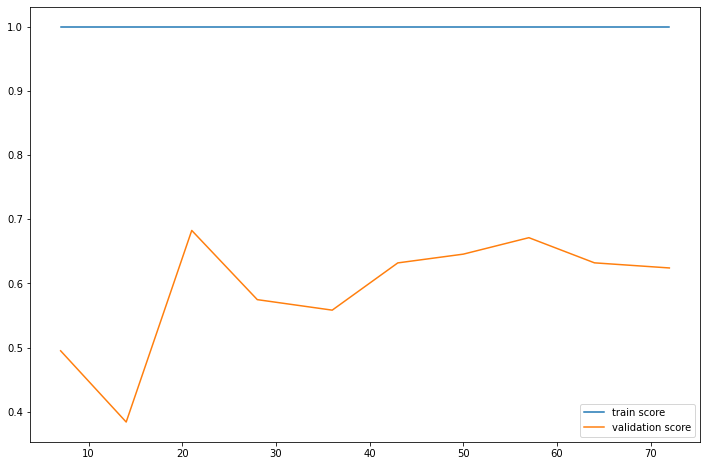

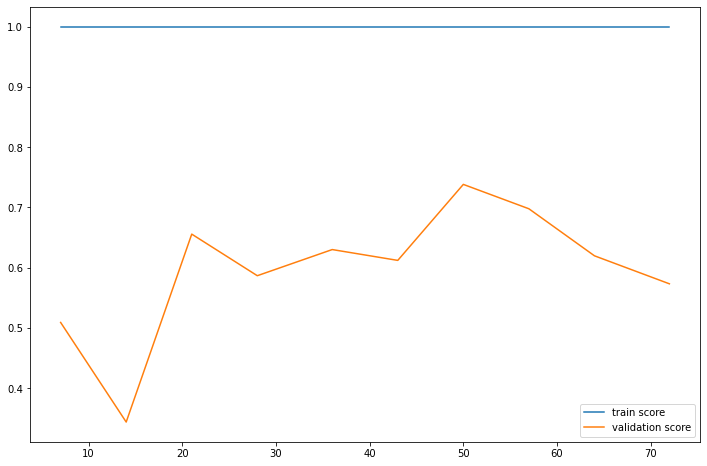

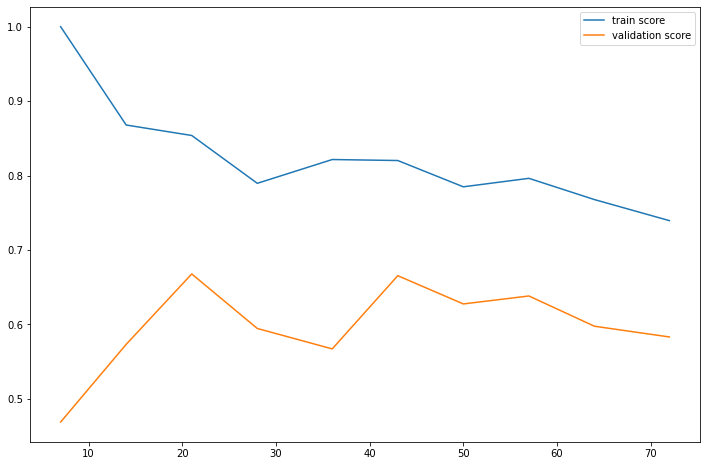

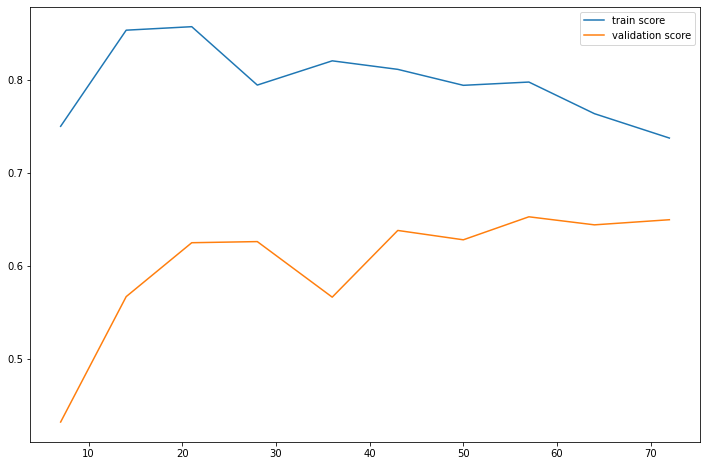

In [57]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 474] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9 202 474] are constant.
  warnings.warn("Features %s are constant." % constant_fe

[[ 7  3]
 [ 3 12]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.80      0.80      0.80        15

    accuracy                           0.76        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

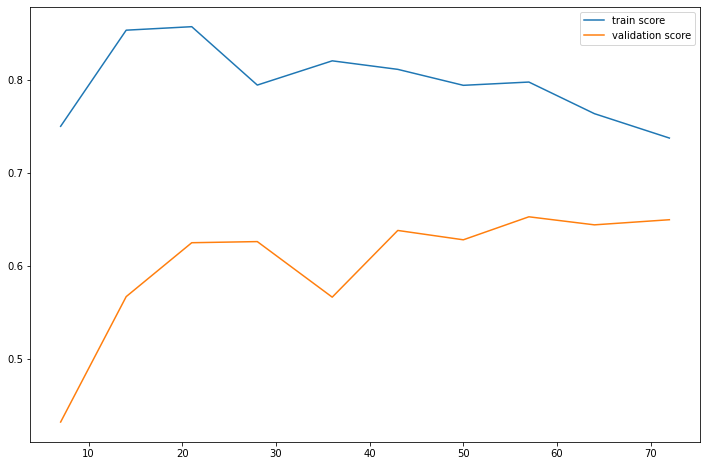

In [58]:
evaluation(model)

[[9 1]
 [6 9]]
              precision    recall  f1-score   support

           1       0.60      0.90      0.72        10
           2       0.90      0.60      0.72        15

    accuracy                           0.72        25
   macro avg       0.75      0.75      0.72        25
weighted avg       0.78      0.72      0.72        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWa

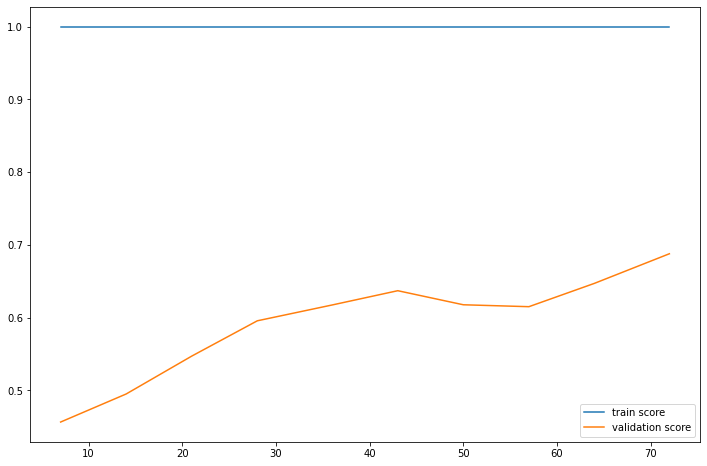

In [59]:
evaluation(model1)

[[ 8  2]
 [ 2 13]]
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.87      0.87      0.87        15

    accuracy                           0.84        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.84      0.84      0.84        25



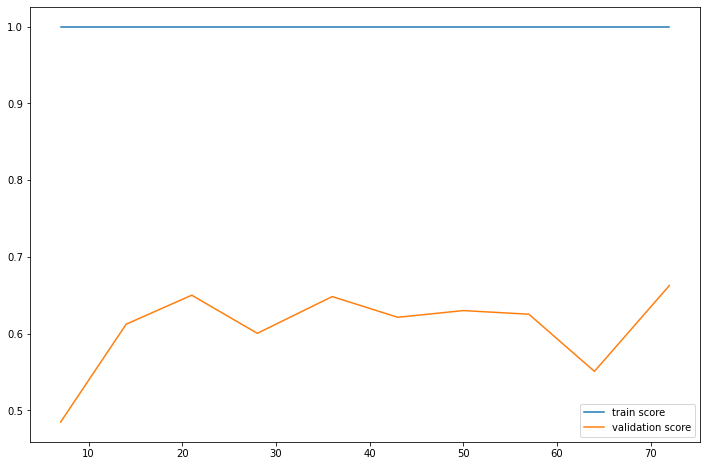

In [60]:
evaluation(model2)

In [61]:
pd.DataFrame(model2.feature_importances_, index=X_train.columns)

,0
premiereDemiVie,0.014247
deuxiemeDemiVie,0.016985
nbDeperd95,0.008529
nbStreamer,0.010289
frequAngStream,0.009368
distance1stDecay,0.001807
firstDecay,0.022711
nbPicsSignif,0.012804
ampl1Pic,0.018470
long1Pic,0.000383


<AxesSubplot:>

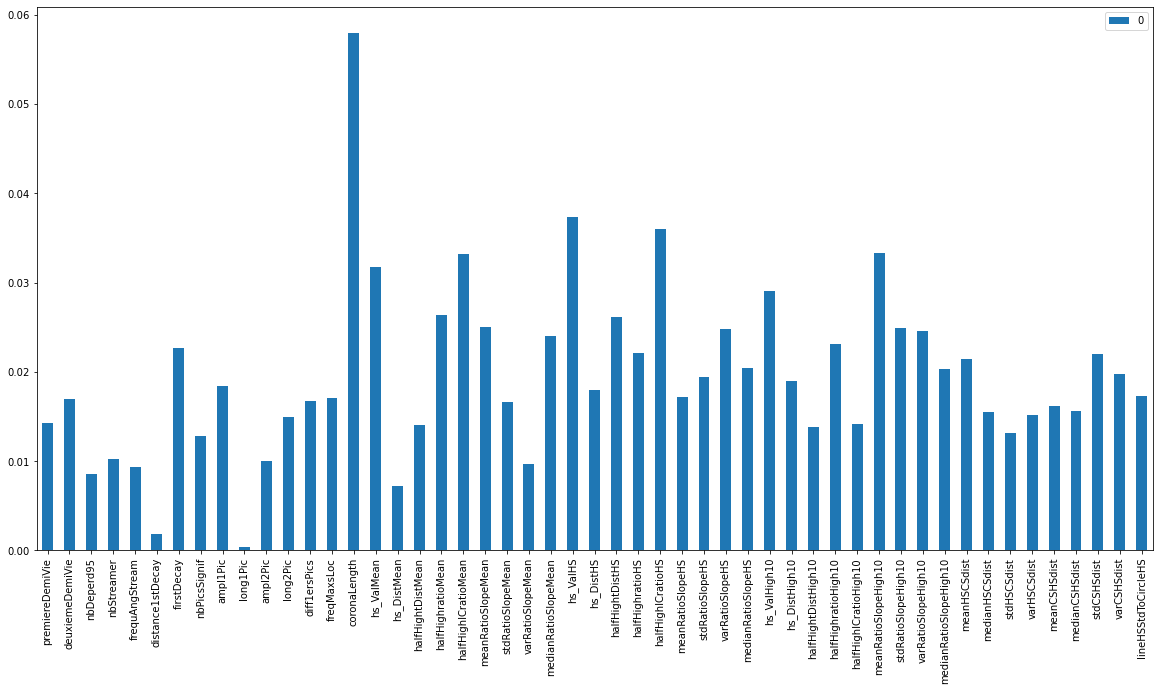

In [63]:

pd.DataFrame(model2.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,10))

# OPTIMISATION 

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [65]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [72]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(25, 49)}

In [73]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=5,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

{'svc__gamma': 0.0001, 'svc__C': 1, 'pipeline__selectkbest__k': 42, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           1       0.62      0.80      0.70        10
           2       0.83      0.67      0.74        15

    accuracy                           0.72        25
   macro avg       0.72      0.73      0.72        25
weighted avg       0.75      0.72      0.72        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    9   474 11559] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    9   202   474 11559] are constant.
  warnings.warn("Features %s are co

[[ 8  2]
 [ 5 10]]
              precision    recall  f1-score   support

           1       0.62      0.80      0.70        10
           2       0.83      0.67      0.74        15

    accuracy                           0.72        25
   macro avg       0.72      0.73      0.72        25
weighted avg       0.75      0.72      0.72        25



/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    9   202   474  5256 11559] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    9   202   474  5256 11559] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    9   202   474  5256 11559] are c

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [202] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

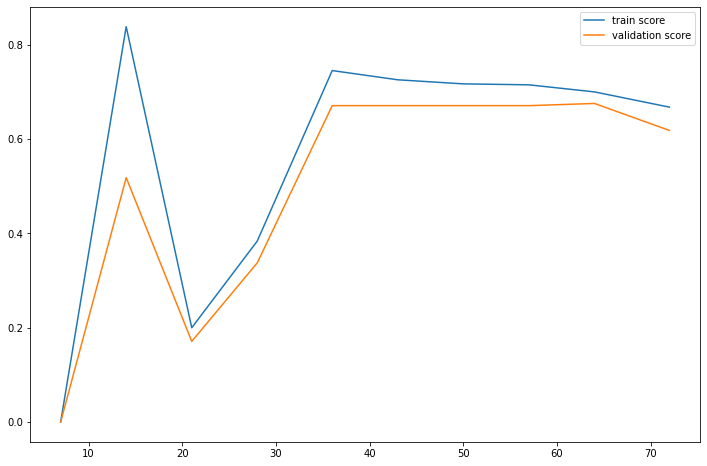

In [74]:
evaluation(grid.best_estimator_)

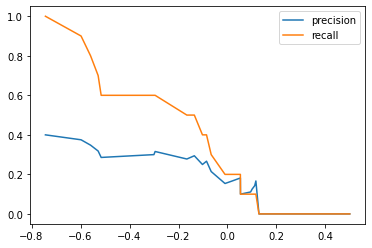

In [80]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test), pos_label=1)
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

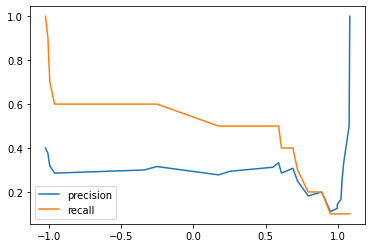

In [83]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, SVM.decision_function(X_test), pos_label=1)
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [93]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold
y_pred = model_final(grid.best_estimator_, X_test, threshold=0.0)

In [94]:
from sklearn.metrics import recall_score
f1_score(y_test, y_pred, pos_label='positive', average='micro')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.08

In [95]:
recall_score(y_test, y_pred, pos_label='positive', average='micro')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.08